    def PSO(num_cartoletas, [num_rodadas]):
        para num_rodada em num_rodadas:
            def desenvolve_rodada(num_rodada,num_cartoletas):
                formacao1 = def cria_time(formacao1,num_rodada,num_cartoletas)
                formacao2 = def cria_time(formacao2,num_rodada,num_cartoletas)
                formacao3 = def cria_time(formacao3,num_rodada,num_cartoletas)
                formacao4 = def cria_time(formacao4,num_rodada,num_cartoletas)
                formacao5 = def cria_time(formacao5,num_rodada,num_cartoletas)
                formacao6 = def cria_time(formacao6,num_rodada,num_cartoletas)
                formacao7 = def cria_time(formacao7,num_rodada,num_cartoletas)
                
                retorna custo,pontuacao,time do máximo entre as formações
        retorna times de cada rodada

    def cria_time(formacao,num_rodada,num_cartoletas):
        PSO para criar o time
        retorna time

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
jogadores = pd.read_csv("caRtola/data/desafio_valorizacao/valorizacao_cartola_2018.csv")
jogadores = jogadores[['id','rodada','posicao','pontos','media_pontos','preco','status']]
jogadores.head()

           id  rodada posicao  pontos  media_pontos  preco      status
0       36540      38     zag     0.0          1.55   5.74  Contundido
1       36540      37     zag     0.0          1.55   5.74  Contundido
2       36540      36     zag     0.0          1.55   5.74  Contundido
3       36540      35     zag     0.0          1.55   5.74  Contundido
4       36540      34     zag     0.0          1.55   5.74  Contundido
...       ...     ...     ...     ...           ...    ...         ...
30950  103767      38     mei     0.0          0.00   1.00        Nulo
30951  103772      38     mei     0.0          0.00   1.00        Nulo
30952  103773      38     lat     0.0          0.00   1.00        Nulo
30953  103774      38     mei     0.0          0.00   1.00        Nulo
30954  103776      38     ata     0.0          0.00   0.77        Nulo

[30955 rows x 7 columns]


In [61]:
class Time:
    def __init__(self, formacao, time):
        self.formacao = formacao
        self.time = time
        self.preco = 0
        self.fit = 0
        self.pbest = self
        self.pbest_fit = self.fit
        self.velocidade = [0]*12
        
    def calc_fit(self,jogadores_filt):
        pontos = 0
        for v in self.time:
            pontos += jogadores_filt.iloc[v]['media_pontos']
        self.fit = pontos
        return self.fit

    def calc_custo(self,jogadores_filt,aux=None):
        preco = 0
        if aux != None:
            for v in aux:
                preco += jogadores_filt.iloc[v]['preco']
            return preco
        for v in self.time:
            preco += jogadores_filt.iloc[v]['preco']
        self.preco = preco
        return self.preco
    
    def calc_velocidade(self,gbest):
        B = c1 + c2
        X = 2/(12-B-math.sqrt(abs(B**2-4*B)))
        tx_aprendizagem_1 = random.random()
        tx_aprendizagem_2 = random.random()
        for i in range(len(self.velocidade)):
            self.velocidade[i] = int(X*self.velocidade[i] + c1*tx_aprendizagem_1*(self.pbest.time[i]-self.time[i])+c2*tx_aprendizagem_2*(gbest.time[i]-self.time[i]))
    
    def update_pos(self,vmax,gbest,jogadores_filt):
        new_team = []
        aux = self.time.copy()
        for i in range(len(self.time)):
            if abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < abs((self.time[i]+self.velocidade[i])-gbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < self.velocidade[i] and\
            self.pbest.time[i] not in new_team:
                aux[i] = self.pbest.time[i]
            elif abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < self.velocidade[i] and\
            gbest.time[i] not in new_team:
                aux[i] = gbest.time[i]
            else:
                while (aux[i] in new_team == True):
                    pos = jogadores_filt.iloc[aux[i]]['posicao']
                    new = jogadores_filt.loc[jogadores_filt['posicao']==pos].sample(n = 1)
                    aux[i] = new['order']
            new_team.append(aux[i])
        preco = self.calc_custo(jogadores_filt,new_team)
        if preco <= num_cartoletas:
            self.time = new_team
    
def cria_particulas(formacao,jogadores_filt):
    particulas = []
    for i in range(num_particulas):
        time = []
        if formacao[0] == '4':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 2, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        elif formacao[0] == '5':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 3, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        else:
            defesa = jogadores_filt.loc[(jogadores_filt['posicao']=='zag')|(jogadores_filt['posicao']=='lat')].sample(n = 3, replace = False)
            time += defesa['order'].tolist()
        mei = jogadores_filt.loc[jogadores_filt['posicao']=='mei'].sample(n = int(formacao[1]), replace = False)
        time += mei['order'].tolist()
        
        ata = jogadores_filt.loc[jogadores_filt['posicao']=='ata'].sample(n = int(formacao[2]), replace = False)
        time += ata['order'].tolist()
        
        tec = jogadores_filt.loc[jogadores_filt['posicao']=='tec'].sample(n = 1, replace = False)
        time += tec['order'].tolist()
        
        gol = jogadores_filt.loc[jogadores_filt['posicao']=='gol'].sample(n = 1, replace = False)
        time += gol['order'].tolist()
        
        time_formado = Time(formacao,time)
        particulas.append(time_formado)
    return particulas

def retorna_time(formacao,jogadores_filt,vmax):
    gbest = Time('',[0]*12)
    gbest_fit = 0
    gbest_preco = 0
    particulas = cria_particulas(formacao,jogadores_filt)
    it = 0
    store = []
    while it < max_iteracoes:
        avg = 0
        for p in particulas:
            fit = p.calc_fit(jogadores_filt)
            preco = p.calc_custo(jogadores_filt)
            if fit > gbest_fit and preco <= num_cartoletas:
                gbest_fit = fit
                gbest = p
                gbest_preco = preco
                p.pbest = p
                p.pbest_fit = fit
            elif fit > p.pbest_fit and preco <= num_cartoletas:
                p.pbest = p
                p.pbest_fit = fit 
            avg += fit
        for p in particulas:
            p.calc_velocidade(gbest)
            p.update_pos(vmax,gbest,jogadores_filt)
        it += 1
        store.append(avg/num_particulas)
    final_frame = jogadores_filt.loc[jogadores_filt['order'].isin(gbest.time)]
    return gbest,store

def PSO():
    results = []
    for num_rodada in rodadas:
        max_team = None
        max_team_fit = 0
        jogadores_filt = jogadores.loc[(jogadores['rodada']==num_rodada) & (jogadores['status'] == 'Provável')]
        print(jogadores_filt)
        vmax = jogadores_filt['id'].count()
        jogadores_filt.insert(0, 'order', list(range(0,vmax)))
        for1,store1 = retorna_time('433',jogadores_filt,vmax)
        for2,store2 = retorna_time('442',jogadores_filt,vmax)
        for3,store3 = retorna_time('451',jogadores_filt,vmax)
        for4,store4 = retorna_time('352',jogadores_filt,vmax)
        for5,store5 = retorna_time('343',jogadores_filt,vmax)
        for6,store6 = retorna_time('532',jogadores_filt,vmax)
        for7,store7 = retorna_time('541',jogadores_filt,vmax)
        teams = [for1,for2,for3,for4,for5,for6,for7]
        for t in teams:
            if t.fit > max_team_fit:
                max_team = t
                max_team_fit = t.fit
        results.append(max_team)
        
        df=pd.DataFrame({'x':range(0,max_iteracoes),'433':store1,'442':store2,'451':store3,'352':store4,'343':store5,'532':store6,'541':store7})
        plt.plot( 'x', '433', data=df, marker='o', markerfacecolor='b', markersize=5, color='b', linewidth=2)
        plt.plot( 'x', '442', data=df, marker='v', markerfacecolor='g', markersize=5, color='g', linewidth=2)
        plt.plot( 'x', '451', data=df, marker='1', markerfacecolor='r', markersize=5, color='r', linewidth=2)
        plt.plot( 'x', '352', data=df, marker='2', markerfacecolor='c', markersize=5, color='c', linewidth=2)
        plt.plot( 'x', '343', data=df, marker='p', markerfacecolor='m', markersize=5, color='m', linewidth=2)
        plt.plot( 'x', '532', data=df, marker='x', markerfacecolor='y', markersize=5, color='y', linewidth=2)
        plt.plot( 'x', '541', data=df, marker='d', markerfacecolor='k', markersize=5, color='k', linewidth=2)
        plt.title('Progressão da fitness média das partículas durante a rodada '+str(num_rodada))
        plt.legend()
        plt.show()
        print('Resultados da rodada',num_rodada)
        print('Pontuação Máxima:',round(max_team.fit,2),'| Custo:',round(max_team.preco,2),'| Formação:',max_team.formacao)
        print('---------------------------------------------------------------------------')
        
    return results

### Experimento 1 - avaliando a influência do número de partículas

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


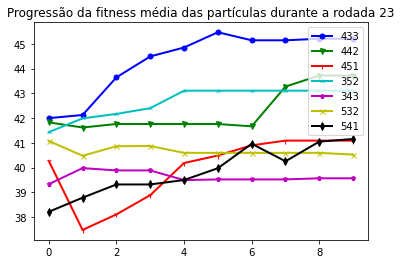

Resultados da rodada 23
Pontuação Máxima: 48.23 | Custo: 85.35 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

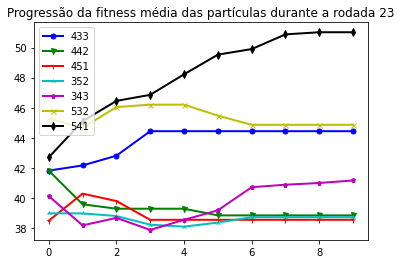

Resultados da rodada 23
Pontuação Máxima: 53.37 | Custo: 88.5 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

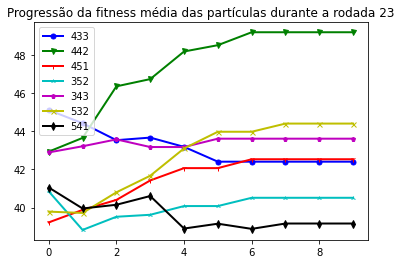

Resultados da rodada 23
Pontuação Máxima: 52.71 | Custo: 89.98 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

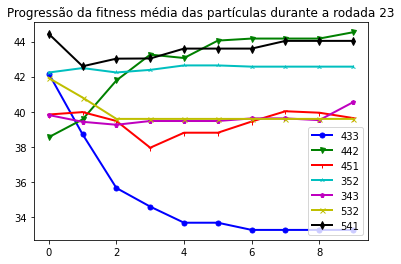

Resultados da rodada 23
Pontuação Máxima: 47.44 | Custo: 87.71 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

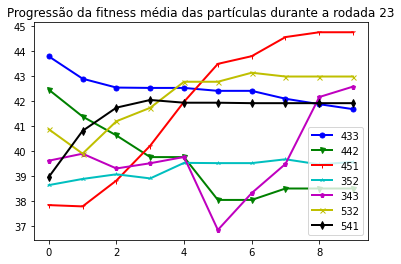

Resultados da rodada 23
Pontuação Máxima: 46.77 | Custo: 80.98 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

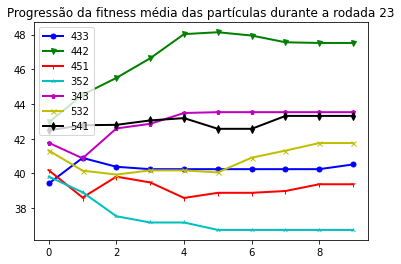

Resultados da rodada 23
Pontuação Máxima: 51.12 | Custo: 81.48 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

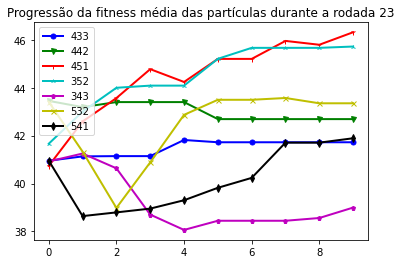

Resultados da rodada 23
Pontuação Máxima: 51.38 | Custo: 89.6 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

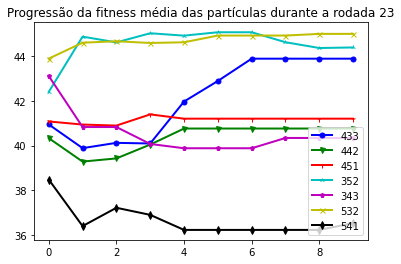

Resultados da rodada 23
Pontuação Máxima: 48.01 | Custo: 85.6 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

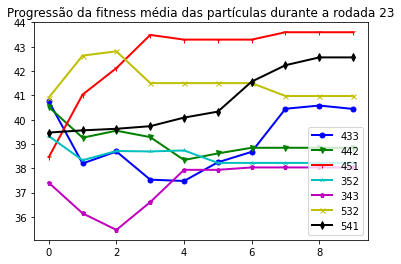

Resultados da rodada 23
Pontuação Máxima: 48.34 | Custo: 87.51 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

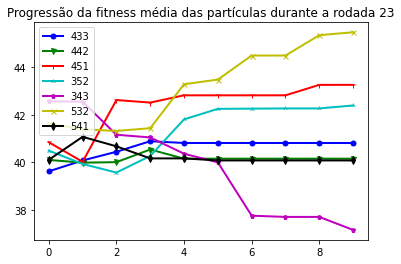

Resultados da rodada 23
Pontuação Máxima: 49.44 | Custo: 88.08 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 49.681 | Desvio padrão da pontuação: 2.19
Média do custo: 86.47900000000001 | Desvio padrão do custo: 2.97


In [62]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 10, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


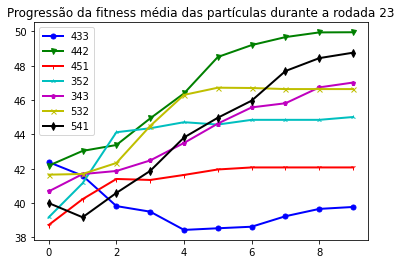

Resultados da rodada 23
Pontuação Máxima: 53.04 | Custo: 82.09 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

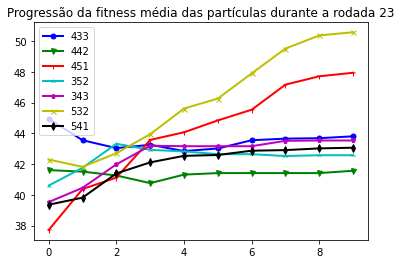

Resultados da rodada 23
Pontuação Máxima: 53.13 | Custo: 88.32 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

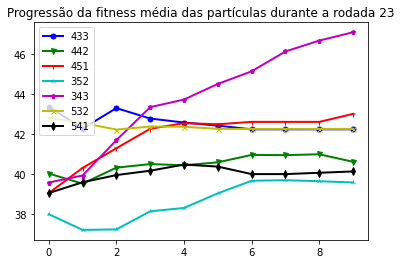

Resultados da rodada 23
Pontuação Máxima: 50.05 | Custo: 85.59 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

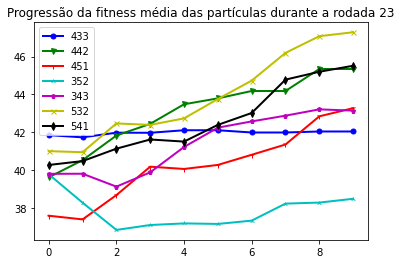

Resultados da rodada 23
Pontuação Máxima: 51.11 | Custo: 84.17 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

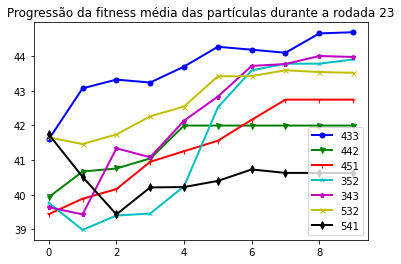

Resultados da rodada 23
Pontuação Máxima: 47.99 | Custo: 85.92 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

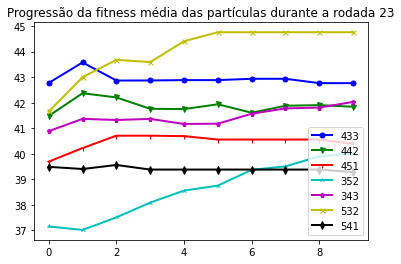

Resultados da rodada 23
Pontuação Máxima: 49.94 | Custo: 88.13 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

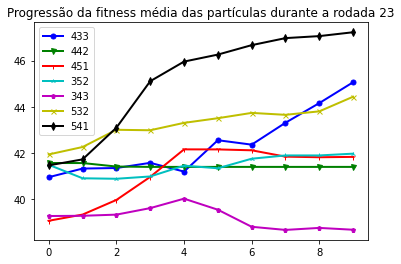

Resultados da rodada 23
Pontuação Máxima: 52.2 | Custo: 88.55 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

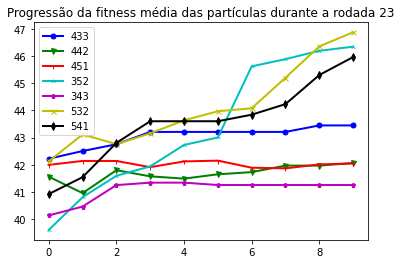

Resultados da rodada 23
Pontuação Máxima: 51.01 | Custo: 88.65 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

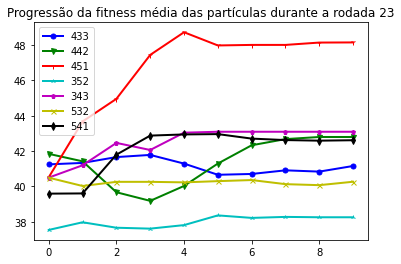

Resultados da rodada 23
Pontuação Máxima: 52.3 | Custo: 86.83 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

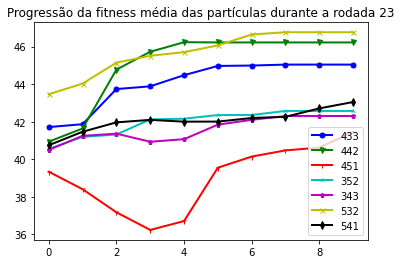

Resultados da rodada 23
Pontuação Máxima: 51.56 | Custo: 85.98 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 51.233000000000004 | Desvio padrão da pontuação: 1.51
Média do custo: 86.423 | Desvio padrão do custo: 2.03


In [63]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 20, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


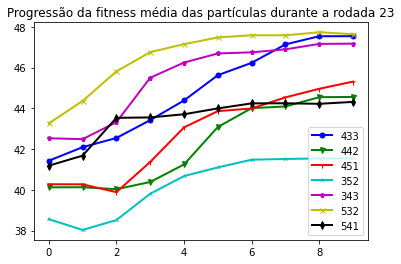

Resultados da rodada 23
Pontuação Máxima: 53.14 | Custo: 88.32 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

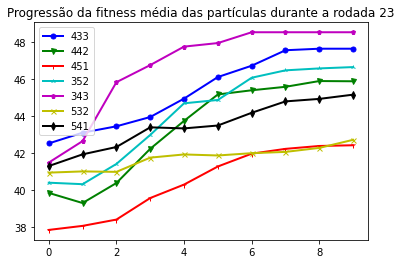

Resultados da rodada 23
Pontuação Máxima: 53.09 | Custo: 84.14 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

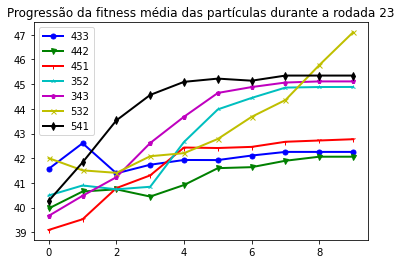

Resultados da rodada 23
Pontuação Máxima: 54.71 | Custo: 87.55 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

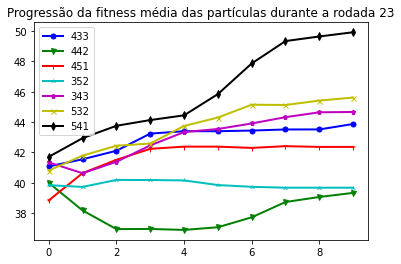

Resultados da rodada 23
Pontuação Máxima: 53.33 | Custo: 86.35 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

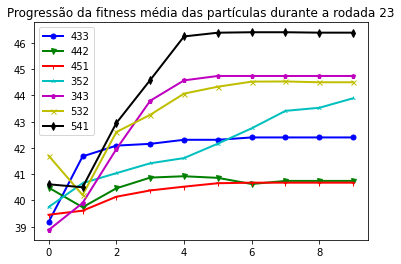

Resultados da rodada 23
Pontuação Máxima: 50.98 | Custo: 87.49 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

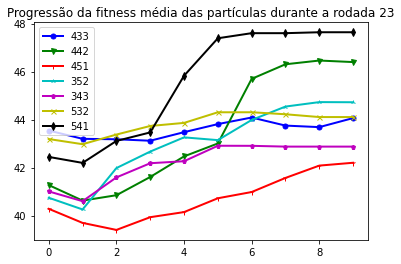

Resultados da rodada 23
Pontuação Máxima: 51.71 | Custo: 84.01 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

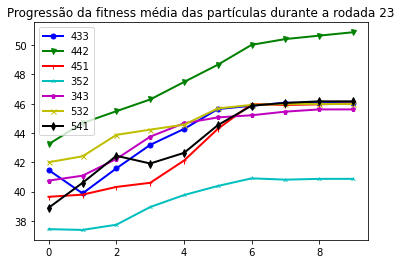

Resultados da rodada 23
Pontuação Máxima: 54.44 | Custo: 83.5 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

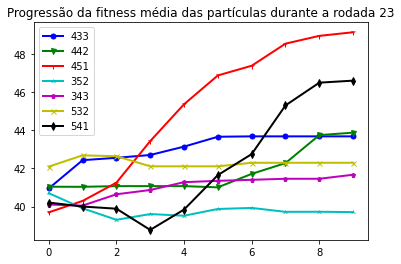

Resultados da rodada 23
Pontuação Máxima: 53.46 | Custo: 87.38 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

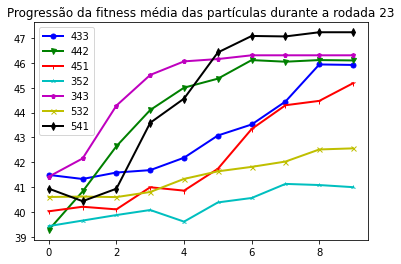

Resultados da rodada 23
Pontuação Máxima: 50.74 | Custo: 87.29 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

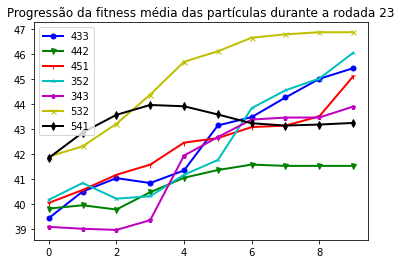

Resultados da rodada 23
Pontuação Máxima: 52.08 | Custo: 89.65 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 52.76800000000001 | Desvio padrão da pontuação: 1.28
Média do custo: 86.568 | Desvio padrão do custo: 1.94


In [64]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Experimento 2 - avaliando a influência de c1 e c2

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


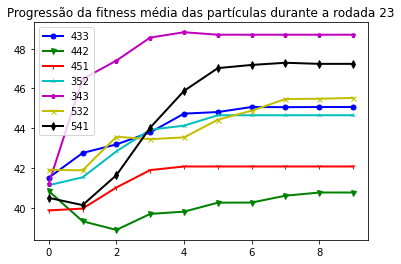

Resultados da rodada 23
Pontuação Máxima: 54.29 | Custo: 84.56 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

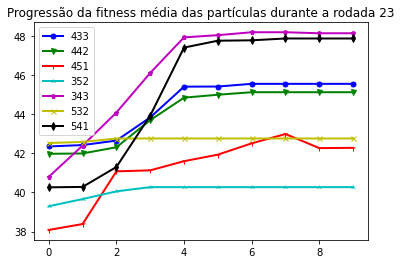

Resultados da rodada 23
Pontuação Máxima: 53.43 | Custo: 88.86 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

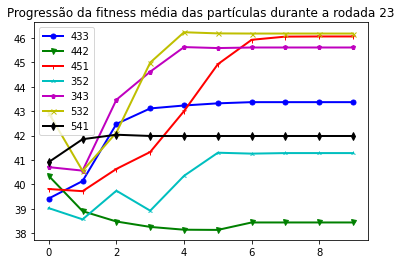

Resultados da rodada 23
Pontuação Máxima: 51.9 | Custo: 89.68 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

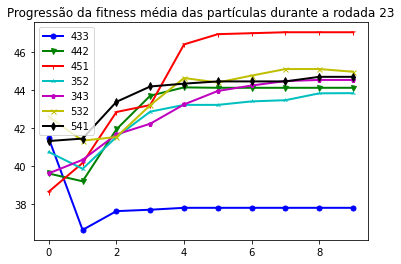

Resultados da rodada 23
Pontuação Máxima: 50.82 | Custo: 87.75 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

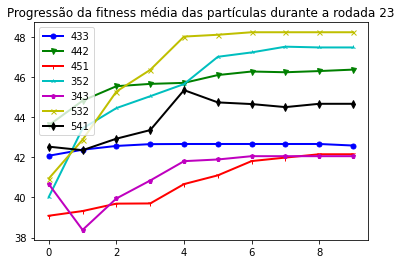

Resultados da rodada 23
Pontuação Máxima: 53.51 | Custo: 87.65 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

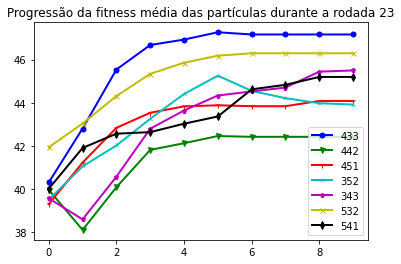

Resultados da rodada 23
Pontuação Máxima: 52.13 | Custo: 89.88 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

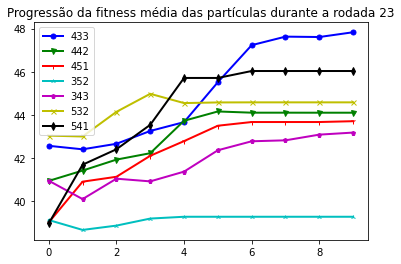

Resultados da rodada 23
Pontuação Máxima: 50.79 | Custo: 88.55 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

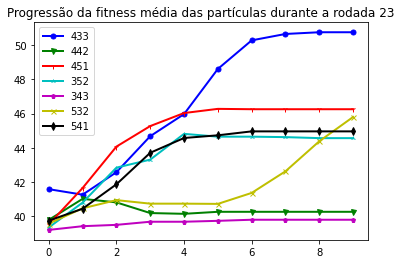

Resultados da rodada 23
Pontuação Máxima: 54.14 | Custo: 88.11 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

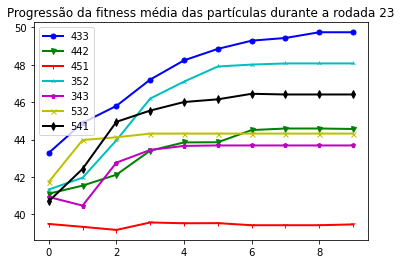

Resultados da rodada 23
Pontuação Máxima: 53.89 | Custo: 89.51 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

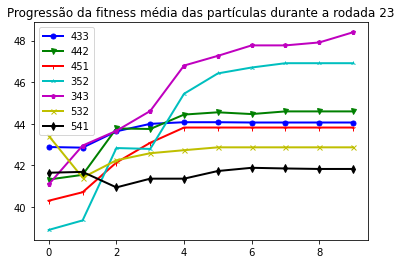

Resultados da rodada 23
Pontuação Máxima: 52.53 | Custo: 89.69 | Formação: 352
---------------------------------------------------------------------------
Média da pontuação: 52.742999999999995 | Desvio padrão da pontuação: 1.24
Média do custo: 88.424 | Desvio padrão do custo: 1.51


In [70]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 2.05, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


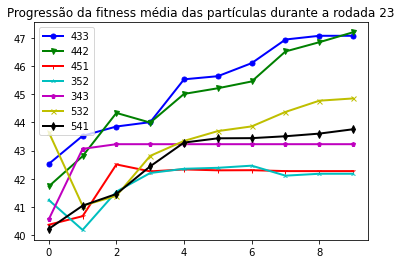

Resultados da rodada 23
Pontuação Máxima: 52.68 | Custo: 89.72 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

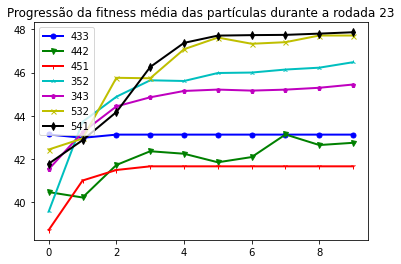

Resultados da rodada 23
Pontuação Máxima: 52.04 | Custo: 89.06 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

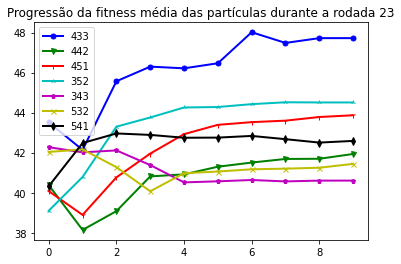

Resultados da rodada 23
Pontuação Máxima: 51.35 | Custo: 89.11 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

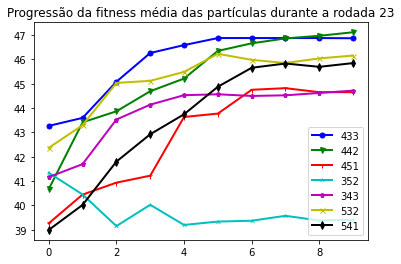

Resultados da rodada 23
Pontuação Máxima: 51.77 | Custo: 89.43 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

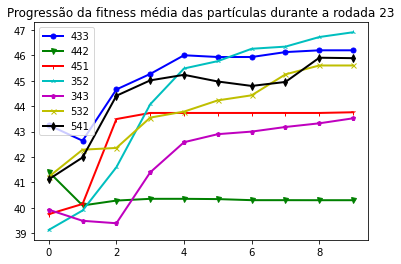

Resultados da rodada 23
Pontuação Máxima: 52.8 | Custo: 89.61 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

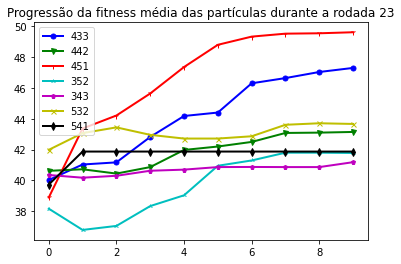

Resultados da rodada 23
Pontuação Máxima: 54.66 | Custo: 89.22 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

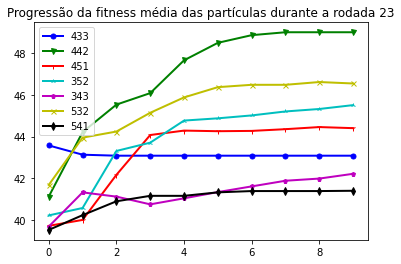

Resultados da rodada 23
Pontuação Máxima: 54.34 | Custo: 84.94 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

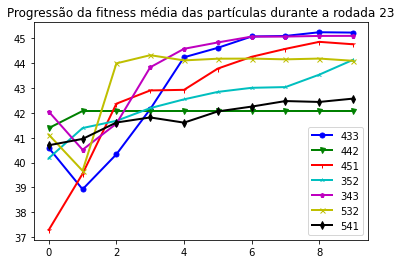

Resultados da rodada 23
Pontuação Máxima: 49.82 | Custo: 86.87 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

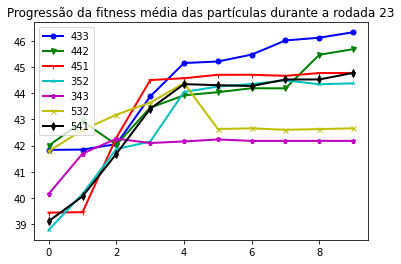

Resultados da rodada 23
Pontuação Máxima: 52.19 | Custo: 89.89 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

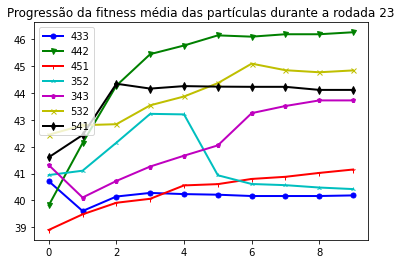

Resultados da rodada 23
Pontuação Máxima: 52.59 | Custo: 87.57 | Formação: 442
---------------------------------------------------------------------------
Média da pontuação: 52.424 | Desvio padrão da pontuação: 1.32
Média do custo: 88.542 | Desvio padrão do custo: 1.51


In [71]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 2.05, 4
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


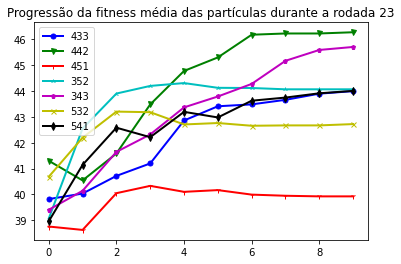

Resultados da rodada 23
Pontuação Máxima: 52.55 | Custo: 87.88 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

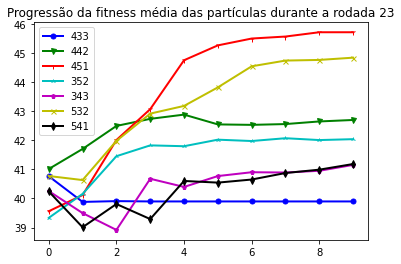

Resultados da rodada 23
Pontuação Máxima: 51.67 | Custo: 89.08 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

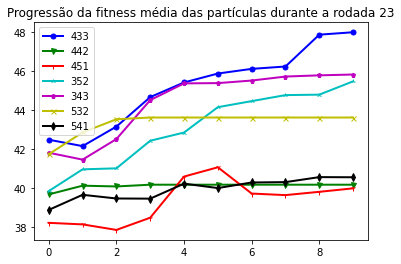

Resultados da rodada 23
Pontuação Máxima: 51.3 | Custo: 83.62 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

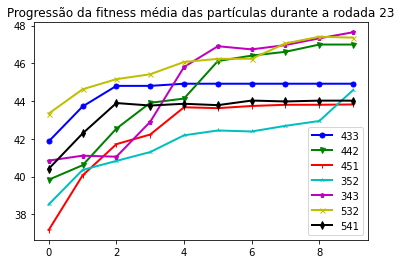

Resultados da rodada 23
Pontuação Máxima: 53.65 | Custo: 89.77 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

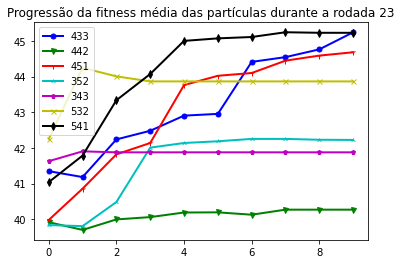

Resultados da rodada 23
Pontuação Máxima: 51.16 | Custo: 88.18 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

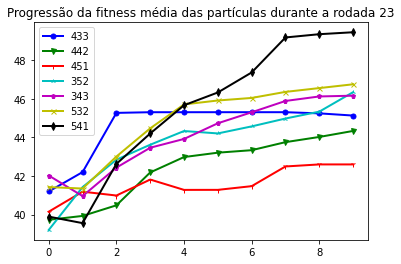

Resultados da rodada 23
Pontuação Máxima: 57.36 | Custo: 89.34 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

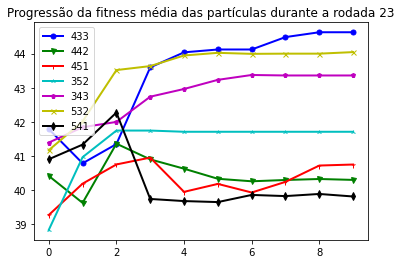

Resultados da rodada 23
Pontuação Máxima: 50.31 | Custo: 87.04 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

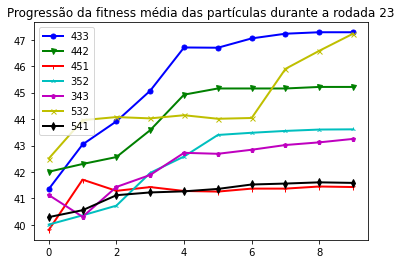

Resultados da rodada 23
Pontuação Máxima: 55.27 | Custo: 87.95 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

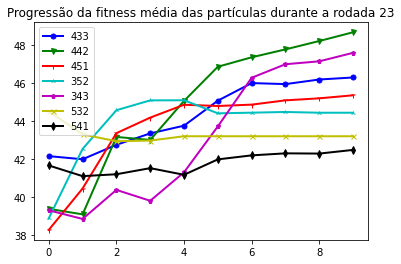

Resultados da rodada 23
Pontuação Máxima: 52.84 | Custo: 89.1 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

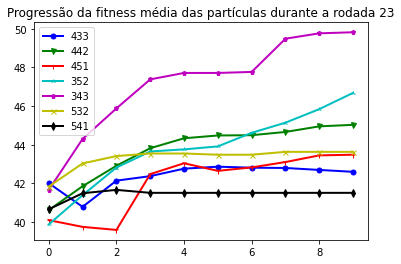

Resultados da rodada 23
Pontuação Máxima: 54.75 | Custo: 89.7 | Formação: 343
---------------------------------------------------------------------------
Média da pontuação: 53.086 | Desvio padrão da pontuação: 2.08
Média do custo: 88.16600000000001 | Desvio padrão do custo: 1.73


In [72]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Experimento 3 - avaliando a influência do máximo de iterações

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


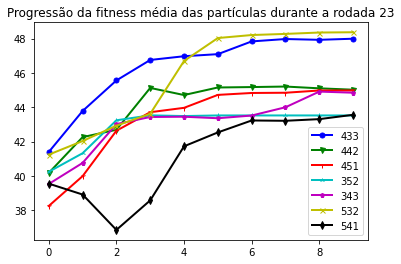

Resultados da rodada 23
Pontuação Máxima: 53.53 | Custo: 82.31 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

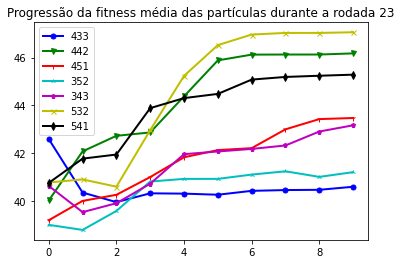

Resultados da rodada 23
Pontuação Máxima: 50.05 | Custo: 88.21 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

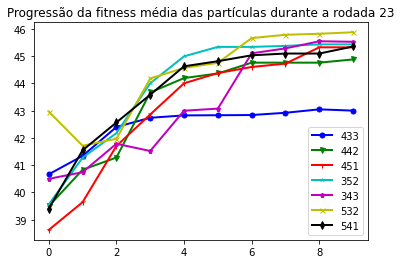

Resultados da rodada 23
Pontuação Máxima: 51.85 | Custo: 87.66 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

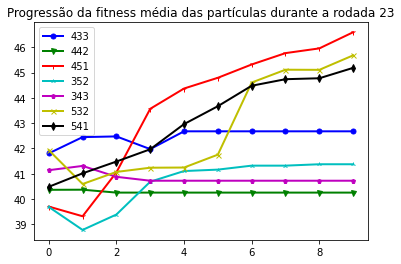

Resultados da rodada 23
Pontuação Máxima: 51.25 | Custo: 89.5 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

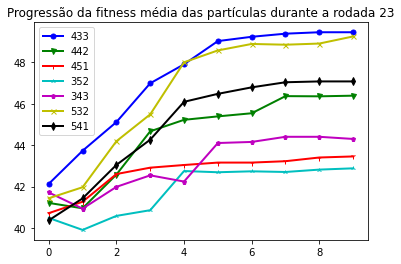

Resultados da rodada 23
Pontuação Máxima: 55.06 | Custo: 87.89 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

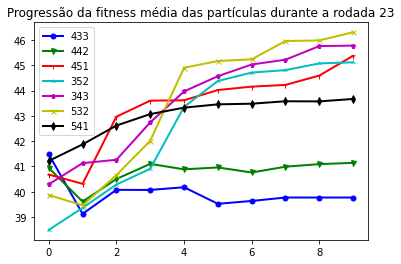

Resultados da rodada 23
Pontuação Máxima: 51.63 | Custo: 85.45 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

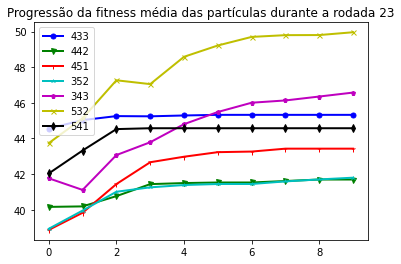

Resultados da rodada 23
Pontuação Máxima: 55.66 | Custo: 88.56 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

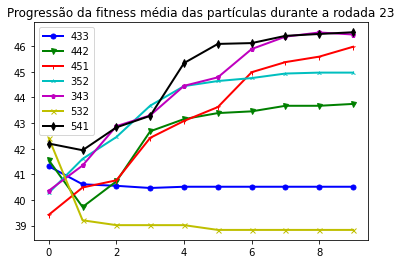

Resultados da rodada 23
Pontuação Máxima: 53.4 | Custo: 88.8 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 colu

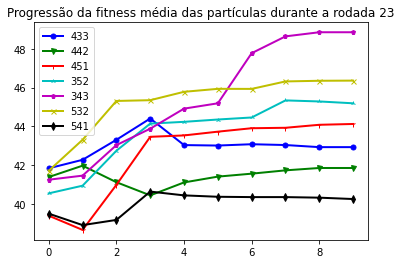

Resultados da rodada 23
Pontuação Máxima: 53.98 | Custo: 87.33 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

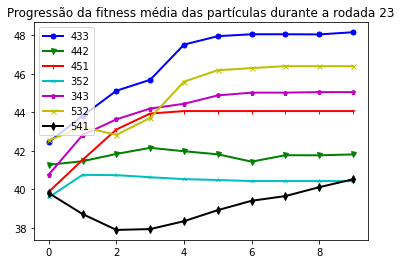

Resultados da rodada 23
Pontuação Máxima: 52.86 | Custo: 86.44 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 52.927 | Desvio padrão da pontuação: 1.66
Média do custo: 87.21499999999999 | Desvio padrão do custo: 1.97


In [73]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


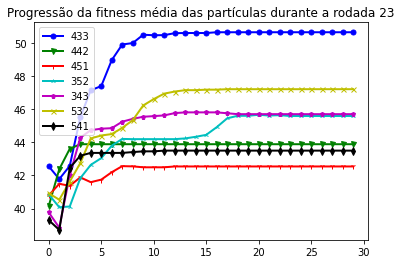

Resultados da rodada 23
Pontuação Máxima: 54.03 | Custo: 85.46 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

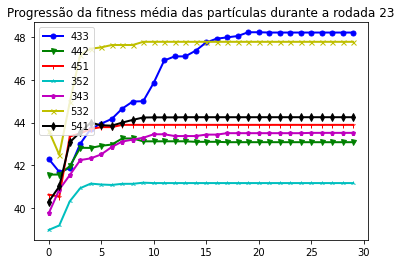

Resultados da rodada 23
Pontuação Máxima: 52.8 | Custo: 89.21 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

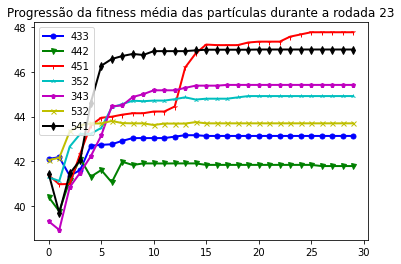

Resultados da rodada 23
Pontuação Máxima: 51.98 | Custo: 87.91 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

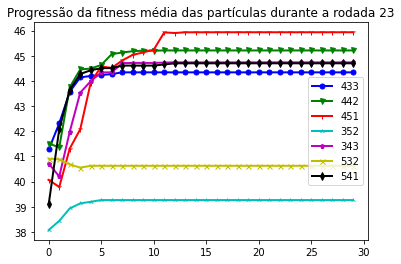

Resultados da rodada 23
Pontuação Máxima: 52.85 | Custo: 88.6 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

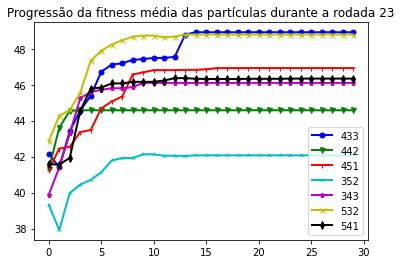

Resultados da rodada 23
Pontuação Máxima: 54.84 | Custo: 89.17 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

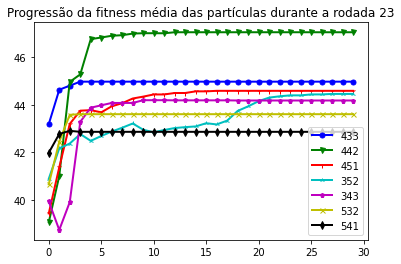

Resultados da rodada 23
Pontuação Máxima: 50.91 | Custo: 83.27 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

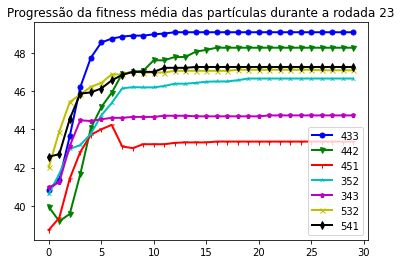

Resultados da rodada 23
Pontuação Máxima: 52.95 | Custo: 89.22 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

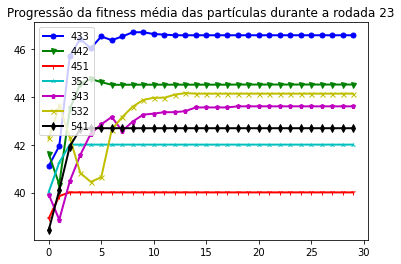

Resultados da rodada 23
Pontuação Máxima: 53.36 | Custo: 84.91 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

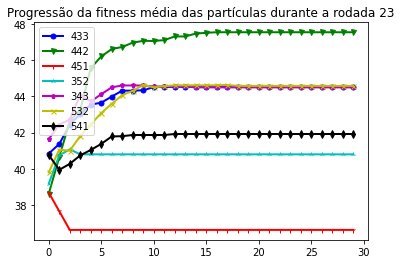

Resultados da rodada 23
Pontuação Máxima: 51.01 | Custo: 89.24 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

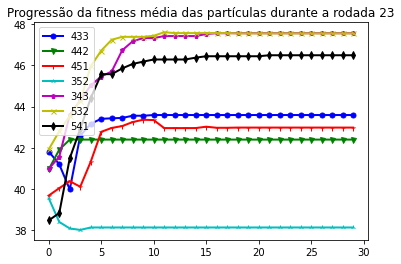

Resultados da rodada 23
Pontuação Máxima: 53.53 | Custo: 88.03 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 52.826 | Desvio padrão da pontuação: 1.18
Média do custo: 87.502 | Desvio padrão do custo: 2.05


In [74]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


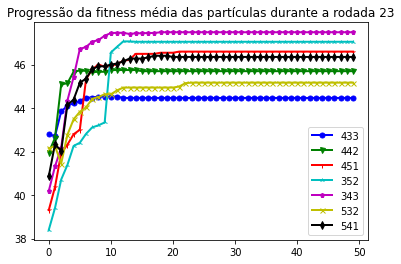

Resultados da rodada 23
Pontuação Máxima: 52.43 | Custo: 87.23 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

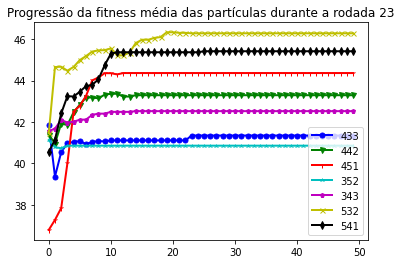

Resultados da rodada 23
Pontuação Máxima: 52.23 | Custo: 87.87 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

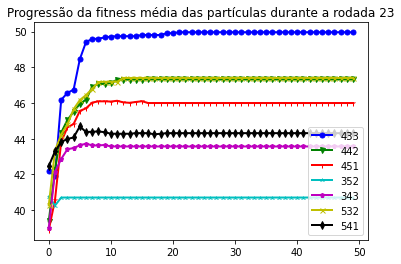

Resultados da rodada 23
Pontuação Máxima: 52.13 | Custo: 81.4 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

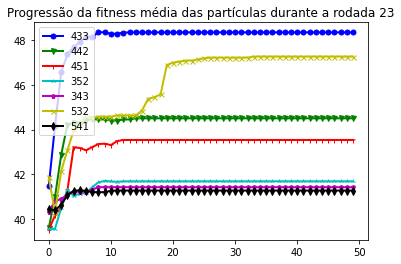

Resultados da rodada 23
Pontuação Máxima: 52.52 | Custo: 80.78 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

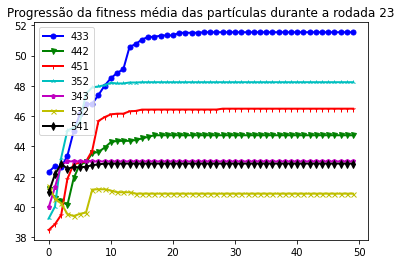

Resultados da rodada 23
Pontuação Máxima: 54.33 | Custo: 86.7 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

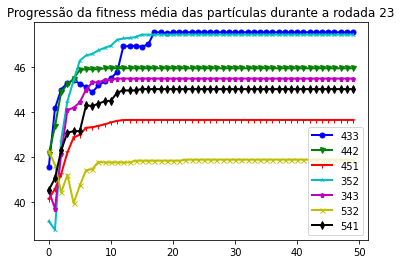

Resultados da rodada 23
Pontuação Máxima: 53.64 | Custo: 86.06 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

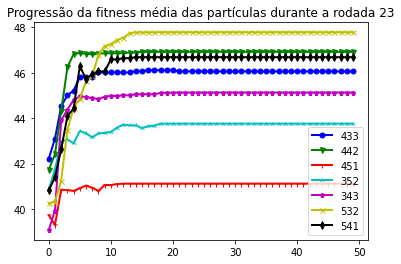

Resultados da rodada 23
Pontuação Máxima: 53.72 | Custo: 88.64 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

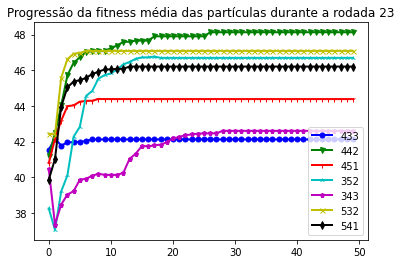

Resultados da rodada 23
Pontuação Máxima: 55.08 | Custo: 88.56 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

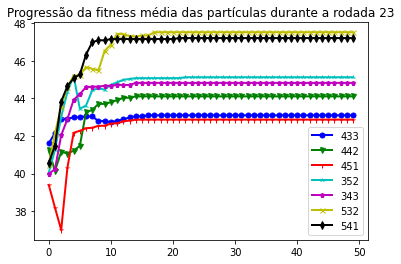

Resultados da rodada 23
Pontuação Máxima: 53.1 | Custo: 87.09 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

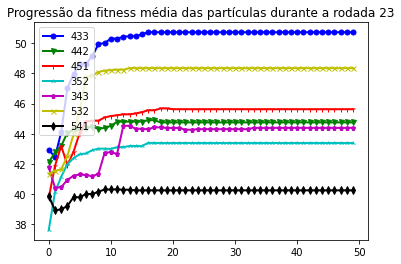

Resultados da rodada 23
Pontuação Máxima: 53.46 | Custo: 89.23 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 53.263999999999996 | Desvio padrão da pontuação: 0.92
Média do custo: 86.35600000000001 | Desvio padrão do custo: 2.79


In [75]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 50, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Após definição dos melhores parâmetros - valores estimados

#### Rodada 11

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


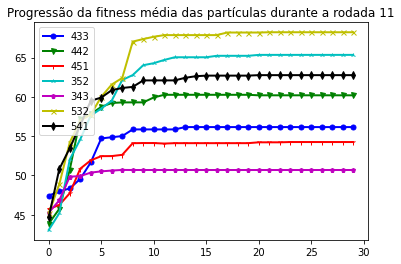

Resultados da rodada 11
Pontuação Máxima: 75.29 | Custo: 87.91 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

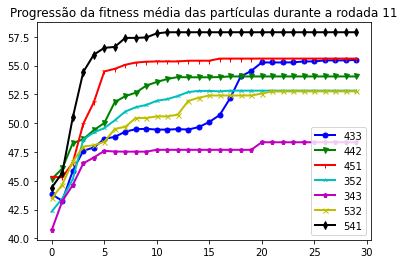

Resultados da rodada 11
Pontuação Máxima: 63.19 | Custo: 86.51 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

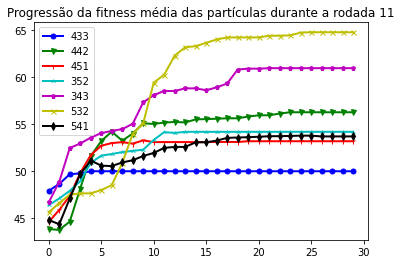

Resultados da rodada 11
Pontuação Máxima: 72.44 | Custo: 85.55 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

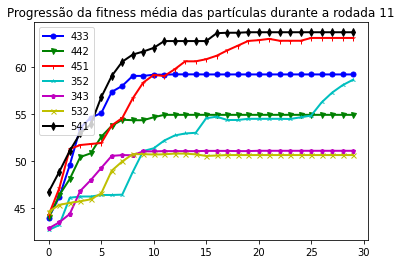

Resultados da rodada 11
Pontuação Máxima: 74.4 | Custo: 88.51 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 col

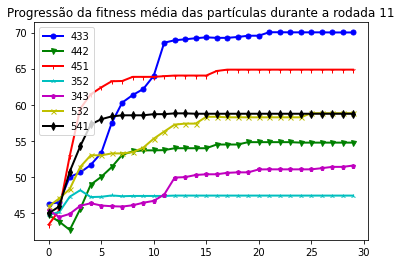

Resultados da rodada 11
Pontuação Máxima: 75.79 | Custo: 89.41 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

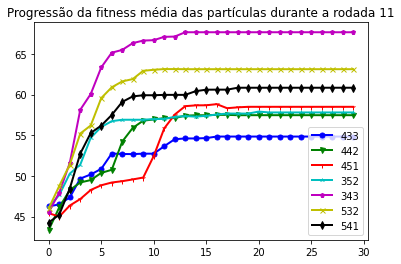

Resultados da rodada 11
Pontuação Máxima: 77.56 | Custo: 89.51 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

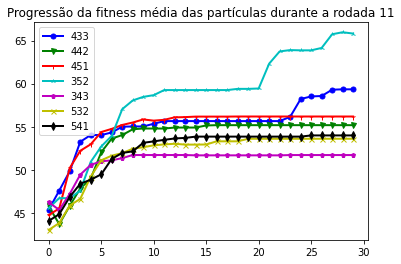

Resultados da rodada 11
Pontuação Máxima: 72.21 | Custo: 88.39 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

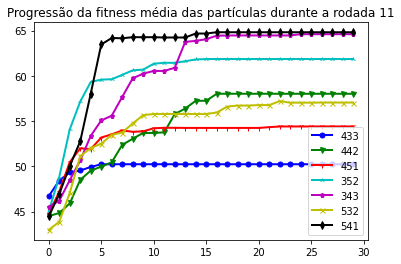

Resultados da rodada 11
Pontuação Máxima: 71.88 | Custo: 88.27 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

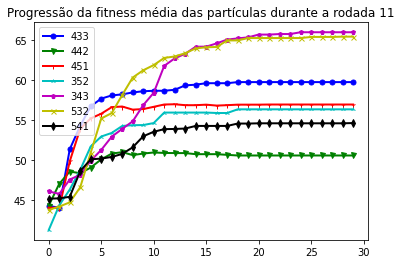

Resultados da rodada 11
Pontuação Máxima: 74.13 | Custo: 88.76 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

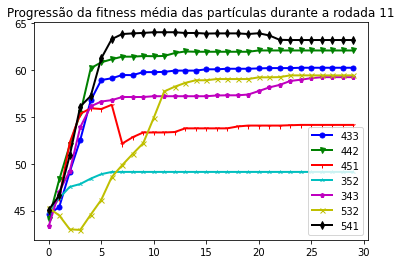

Resultados da rodada 11
Pontuação Máxima: 70.04 | Custo: 84.09 | Formação: 541
---------------------------------------------------------------------------
Média da pontuação: 72.693 | Desvio padrão da pontuação: 3.79
Média do custo: 87.691 | Desvio padrão do custo: 1.67


In [76]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


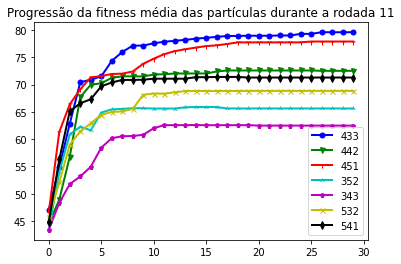

Resultados da rodada 11
Pontuação Máxima: 86.2 | Custo: 132.42 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

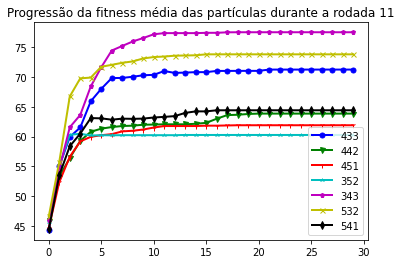

Resultados da rodada 11
Pontuação Máxima: 83.53 | Custo: 136.45 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

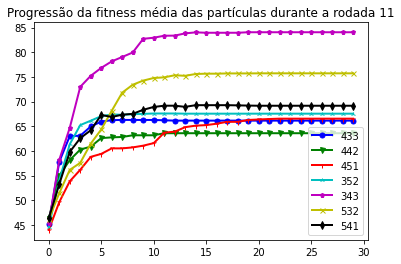

Resultados da rodada 11
Pontuação Máxima: 88.25 | Custo: 126.64 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

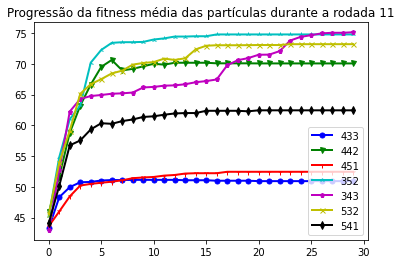

Resultados da rodada 11
Pontuação Máxima: 81.12 | Custo: 122.93 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

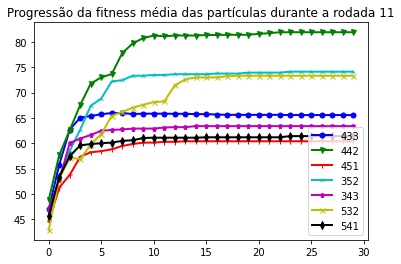

Resultados da rodada 11
Pontuação Máxima: 88.11 | Custo: 143.71 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

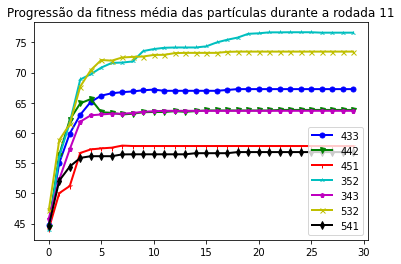

Resultados da rodada 11
Pontuação Máxima: 84.67 | Custo: 155.23 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

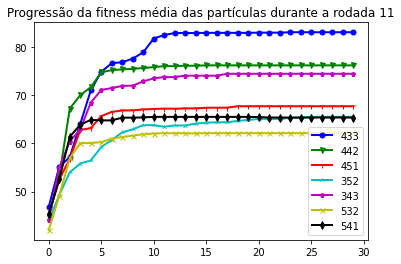

Resultados da rodada 11
Pontuação Máxima: 95.22 | Custo: 142.4 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

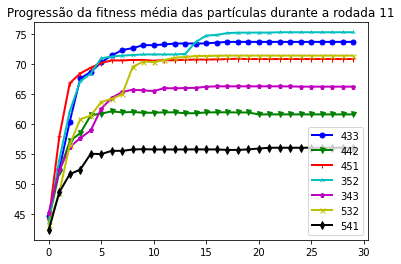

Resultados da rodada 11
Pontuação Máxima: 83.1 | Custo: 144.17 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

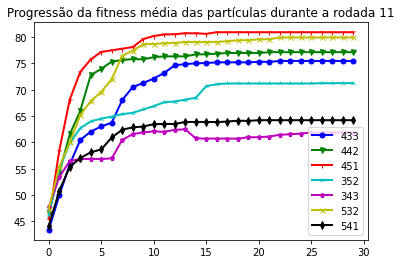

Resultados da rodada 11
Pontuação Máxima: 88.18 | Custo: 125.14 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

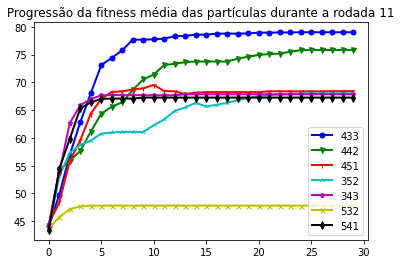

Resultados da rodada 11
Pontuação Máxima: 86.16 | Custo: 138.3 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 86.454 | Desvio padrão da pontuação: 3.71
Média do custo: 136.739 | Desvio padrão do custo: 9.62


In [77]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


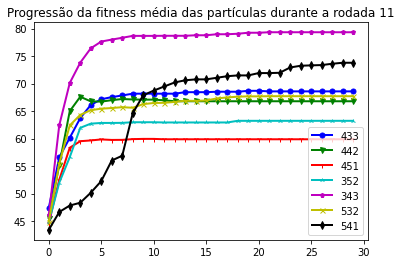

Resultados da rodada 11
Pontuação Máxima: 85.4 | Custo: 151.93 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

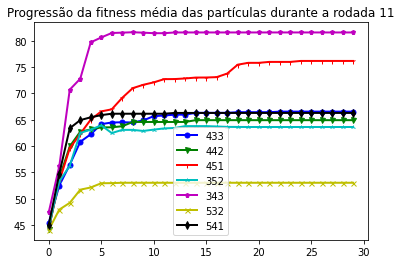

Resultados da rodada 11
Pontuação Máxima: 87.81 | Custo: 146.07 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

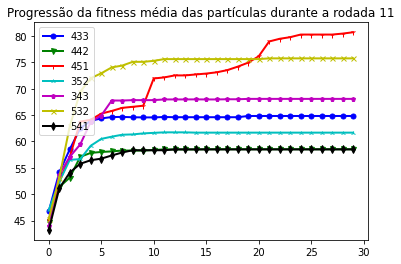

Resultados da rodada 11
Pontuação Máxima: 87.0 | Custo: 118.09 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

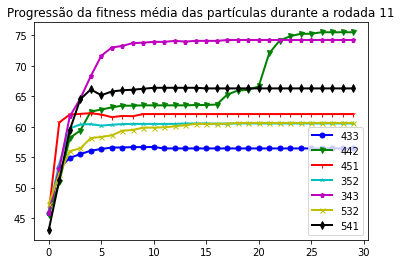

Resultados da rodada 11
Pontuação Máxima: 81.23 | Custo: 173.06 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

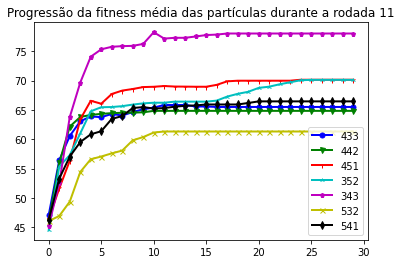

Resultados da rodada 11
Pontuação Máxima: 87.99 | Custo: 130.55 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

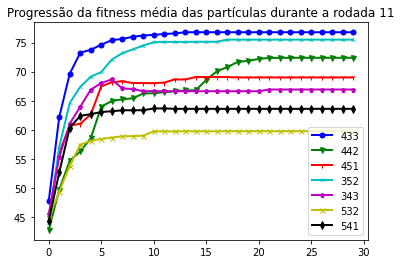

Resultados da rodada 11
Pontuação Máxima: 82.93 | Custo: 126.0 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

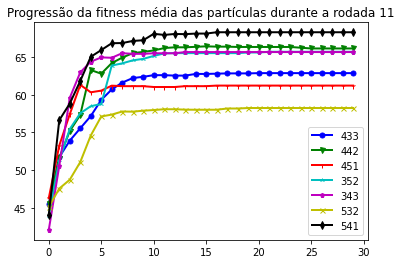

Resultados da rodada 11
Pontuação Máxima: 75.46 | Custo: 155.77 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

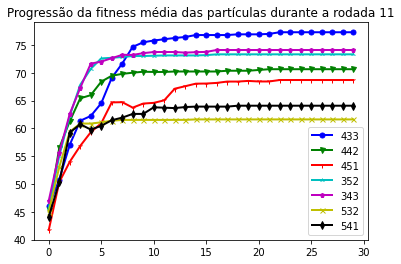

Resultados da rodada 11
Pontuação Máxima: 81.82 | Custo: 130.67 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

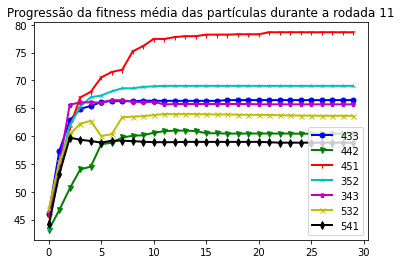

Resultados da rodada 11
Pontuação Máxima: 84.61 | Custo: 114.53 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

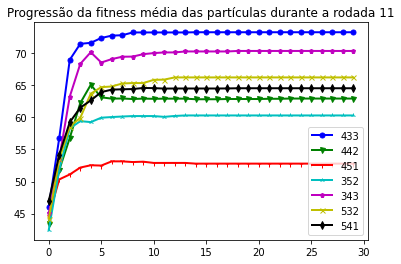

Resultados da rodada 11
Pontuação Máxima: 82.91 | Custo: 122.42 | Formação: 343
---------------------------------------------------------------------------
Média da pontuação: 83.71600000000002 | Desvio padrão da pontuação: 3.59
Média do custo: 136.90900000000002 | Desvio padrão do custo: 17.99


In [78]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 23

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


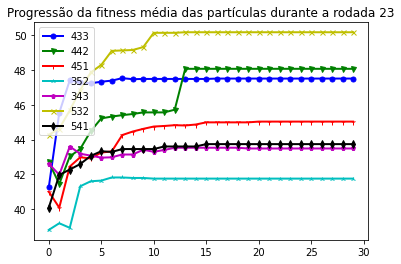

Resultados da rodada 23
Pontuação Máxima: 56.51 | Custo: 86.04 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

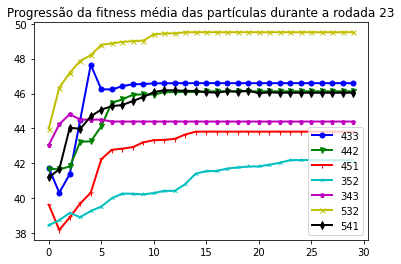

Resultados da rodada 23
Pontuação Máxima: 53.47 | Custo: 89.72 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

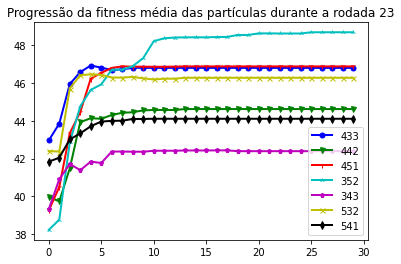

Resultados da rodada 23
Pontuação Máxima: 53.52 | Custo: 89.91 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

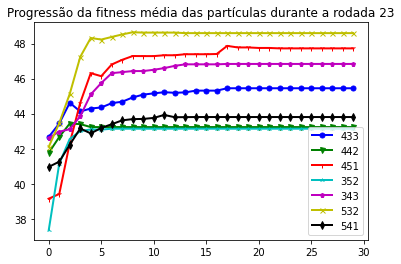

Resultados da rodada 23
Pontuação Máxima: 52.82 | Custo: 88.29 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

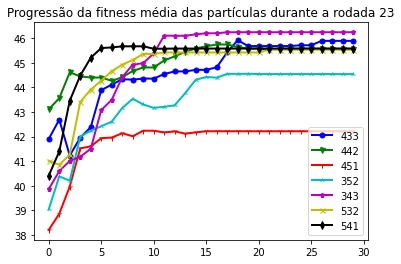

Resultados da rodada 23
Pontuação Máxima: 52.81 | Custo: 88.88 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

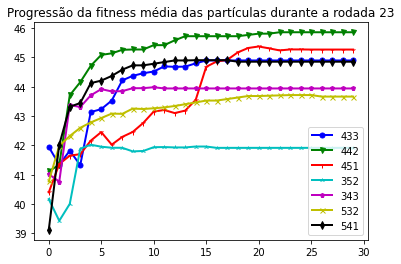

Resultados da rodada 23
Pontuação Máxima: 51.22 | Custo: 85.36 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

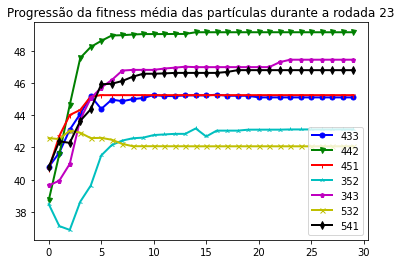

Resultados da rodada 23
Pontuação Máxima: 52.84 | Custo: 89.85 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

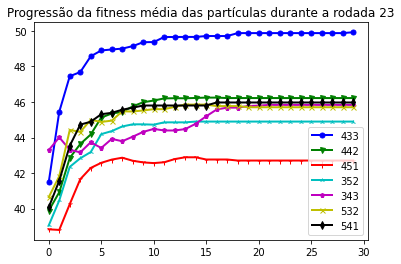

Resultados da rodada 23
Pontuação Máxima: 54.88 | Custo: 89.74 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

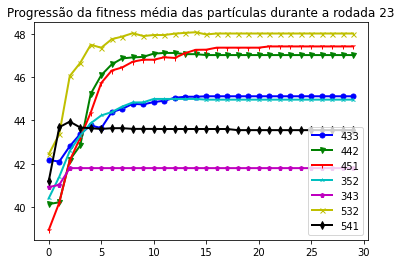

Resultados da rodada 23
Pontuação Máxima: 52.25 | Custo: 84.45 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

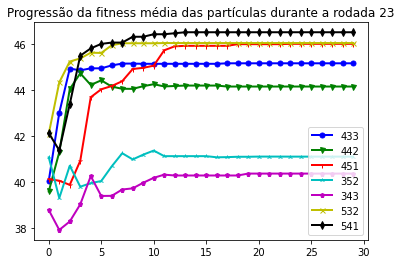

Resultados da rodada 23
Pontuação Máxima: 52.64 | Custo: 89.18 | Formação: 541
---------------------------------------------------------------------------
Média da pontuação: 53.29600000000001 | Desvio padrão da pontuação: 1.39
Média do custo: 88.142 | Desvio padrão do custo: 1.96


In [79]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


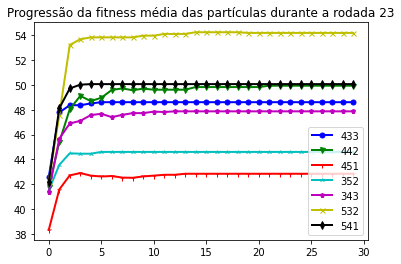

Resultados da rodada 23
Pontuação Máxima: 60.79 | Custo: 125.7 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

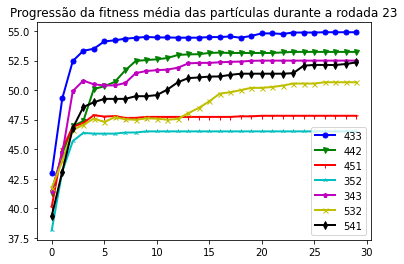

Resultados da rodada 23
Pontuação Máxima: 62.94 | Custo: 119.21 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

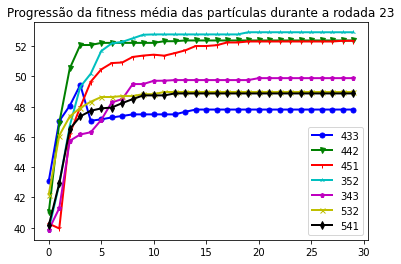

Resultados da rodada 23
Pontuação Máxima: 60.49 | Custo: 131.33 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

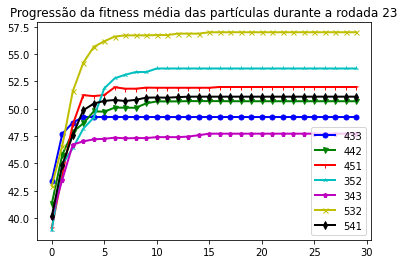

Resultados da rodada 23
Pontuação Máxima: 66.24 | Custo: 130.72 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

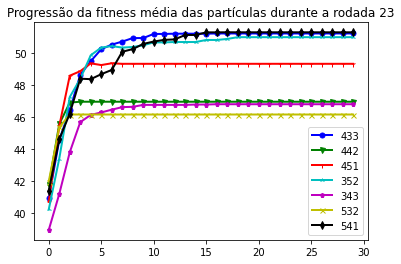

Resultados da rodada 23
Pontuação Máxima: 58.21 | Custo: 134.62 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

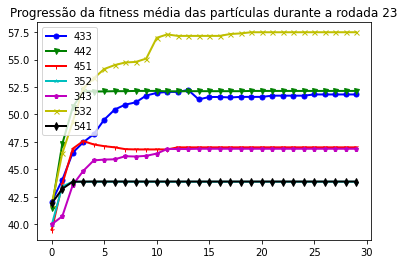

Resultados da rodada 23
Pontuação Máxima: 66.62 | Custo: 135.18 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

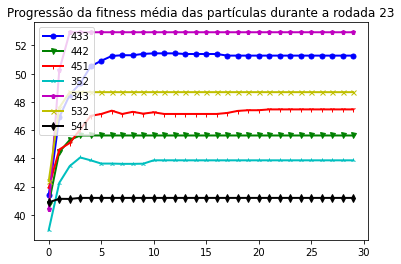

Resultados da rodada 23
Pontuação Máxima: 64.88 | Custo: 135.54 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

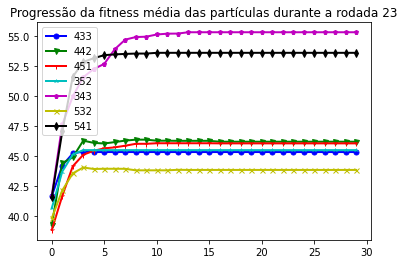

Resultados da rodada 23
Pontuação Máxima: 62.59 | Custo: 121.12 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

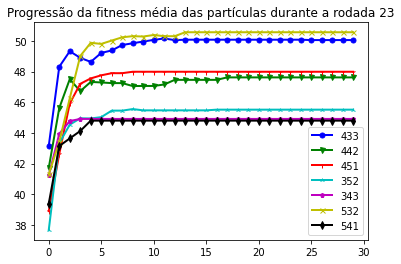

Resultados da rodada 23
Pontuação Máxima: 57.49 | Custo: 115.18 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

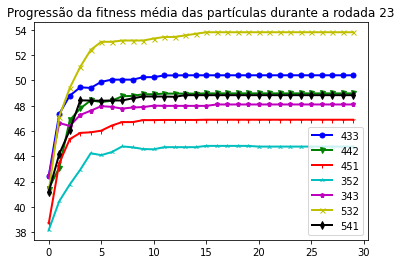

Resultados da rodada 23
Pontuação Máxima: 58.54 | Custo: 120.67 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 61.879 | Desvio padrão da pontuação: 3.15
Média do custo: 126.92700000000002 | Desvio padrão do custo: 7.12


In [80]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


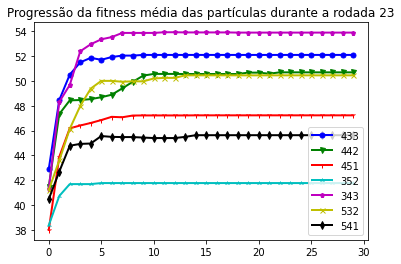

Resultados da rodada 23
Pontuação Máxima: 63.46 | Custo: 131.82 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

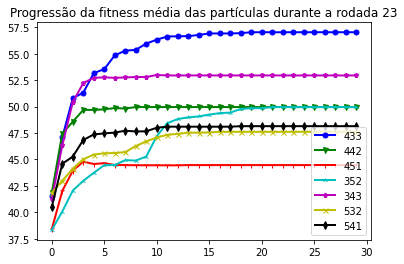

Resultados da rodada 23
Pontuação Máxima: 61.3 | Custo: 128.97 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

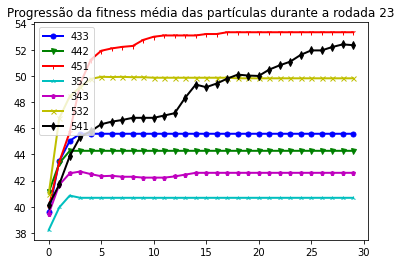

Resultados da rodada 23
Pontuação Máxima: 61.72 | Custo: 124.98 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

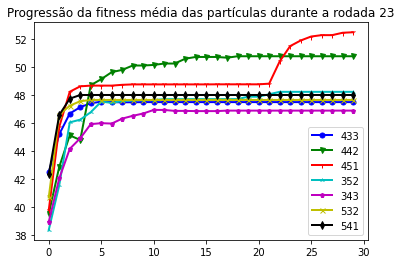

Resultados da rodada 23
Pontuação Máxima: 59.85 | Custo: 112.7 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

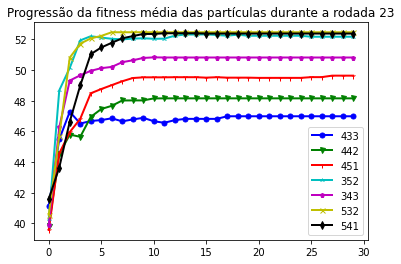

Resultados da rodada 23
Pontuação Máxima: 60.96 | Custo: 104.22 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

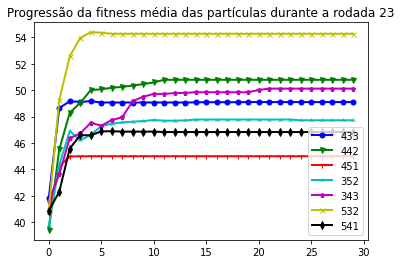

Resultados da rodada 23
Pontuação Máxima: 64.29 | Custo: 133.76 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

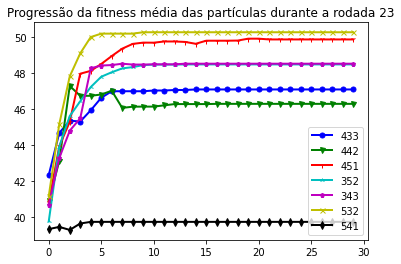

Resultados da rodada 23
Pontuação Máxima: 58.71 | Custo: 124.22 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

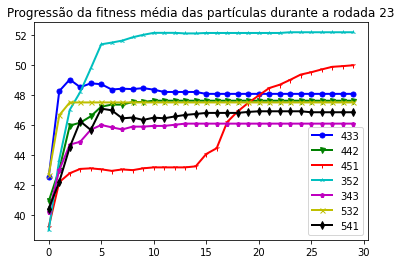

Resultados da rodada 23
Pontuação Máxima: 60.9 | Custo: 133.63 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

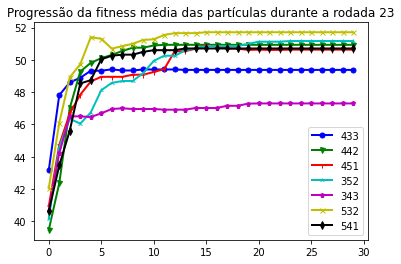

Resultados da rodada 23
Pontuação Máxima: 60.85 | Custo: 125.95 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

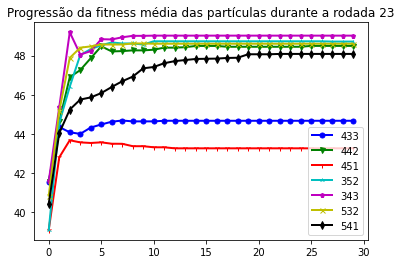

Resultados da rodada 23
Pontuação Máxima: 59.55 | Custo: 148.02 | Formação: 343
---------------------------------------------------------------------------
Média da pontuação: 61.15899999999999 | Desvio padrão da pontuação: 1.61
Média do custo: 126.827 | Desvio padrão do custo: 11.38


In [81]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 38

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


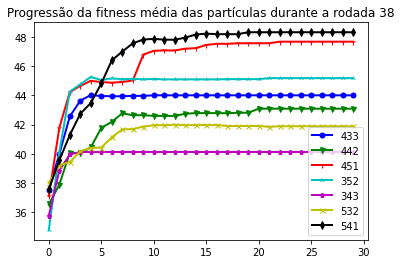

Resultados da rodada 38
Pontuação Máxima: 53.79 | Custo: 77.39 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

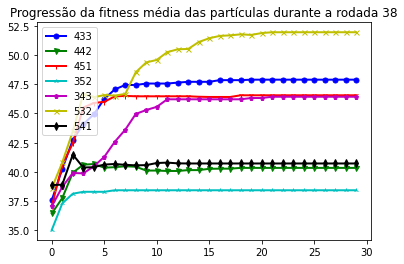

Resultados da rodada 38
Pontuação Máxima: 55.64 | Custo: 67.91 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

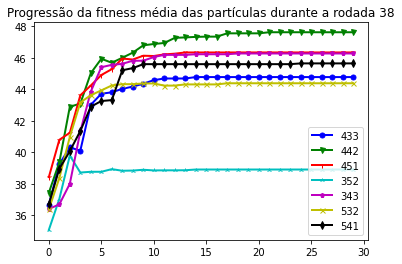

Resultados da rodada 38
Pontuação Máxima: 54.38 | Custo: 86.72 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

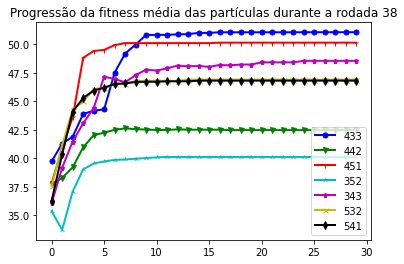

Resultados da rodada 38
Pontuação Máxima: 54.97 | Custo: 65.06 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

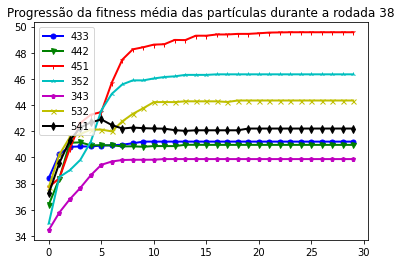

Resultados da rodada 38
Pontuação Máxima: 53.38 | Custo: 85.71 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

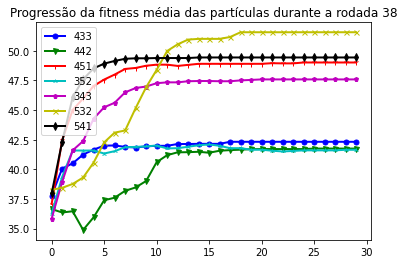

Resultados da rodada 38
Pontuação Máxima: 55.37 | Custo: 89.11 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

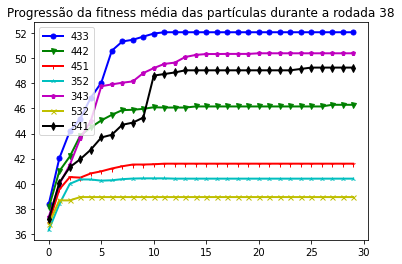

Resultados da rodada 38
Pontuação Máxima: 55.73 | Custo: 82.82 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

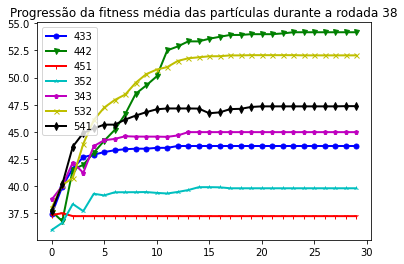

Resultados da rodada 38
Pontuação Máxima: 57.78 | Custo: 85.1 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

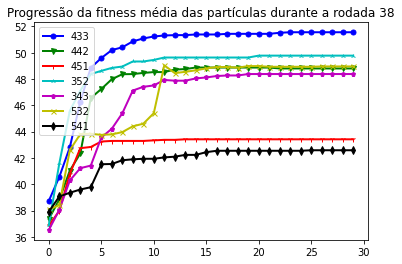

Resultados da rodada 38
Pontuação Máxima: 57.0 | Custo: 89.38 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

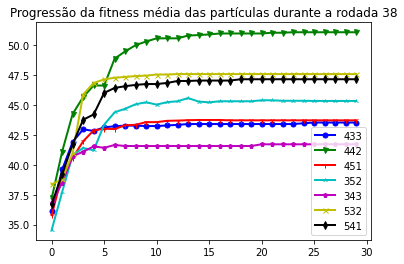

Resultados da rodada 38
Pontuação Máxima: 54.71 | Custo: 86.14 | Formação: 442
---------------------------------------------------------------------------
Média da pontuação: 55.275 | Desvio padrão da pontuação: 1.29
Média do custo: 81.534 | Desvio padrão do custo: 8.2


In [82]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


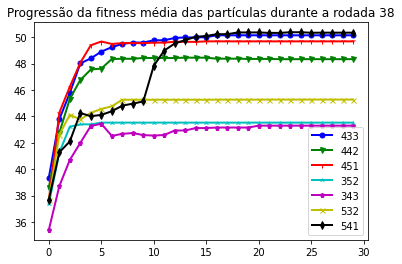

Resultados da rodada 38
Pontuação Máxima: 57.8 | Custo: 105.22 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

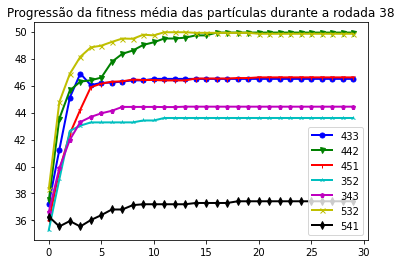

Resultados da rodada 38
Pontuação Máxima: 58.95 | Custo: 104.05 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

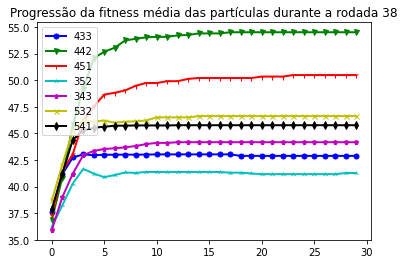

Resultados da rodada 38
Pontuação Máxima: 60.81 | Custo: 107.17 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

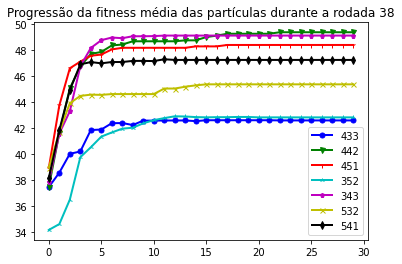

Resultados da rodada 38
Pontuação Máxima: 58.28 | Custo: 116.09 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

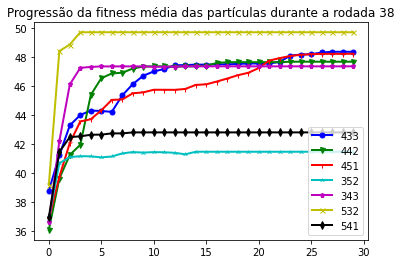

Resultados da rodada 38
Pontuação Máxima: 58.68 | Custo: 106.64 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

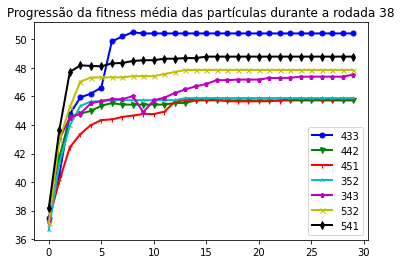

Resultados da rodada 38
Pontuação Máxima: 56.87 | Custo: 95.2 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

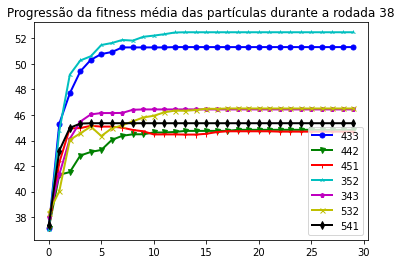

Resultados da rodada 38
Pontuação Máxima: 60.28 | Custo: 96.98 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

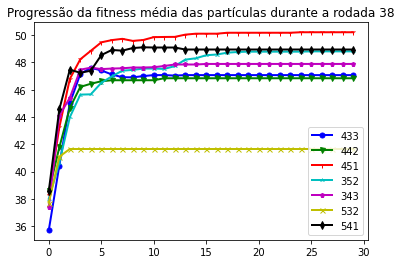

Resultados da rodada 38
Pontuação Máxima: 57.9 | Custo: 104.06 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

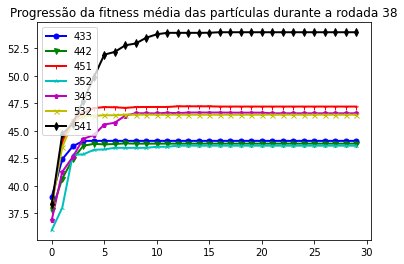

Resultados da rodada 38
Pontuação Máxima: 59.18 | Custo: 99.12 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

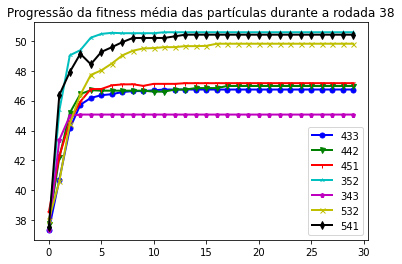

Resultados da rodada 38
Pontuação Máxima: 58.8 | Custo: 127.73 | Formação: 451
---------------------------------------------------------------------------
Média da pontuação: 58.754999999999995 | Desvio padrão da pontuação: 1.1
Média do custo: 106.22600000000003 | Desvio padrão do custo: 9.1


In [83]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


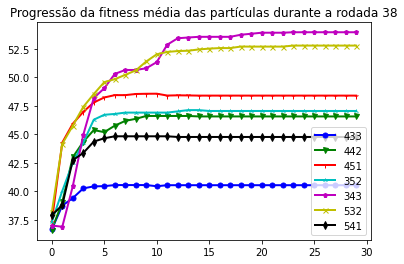

Resultados da rodada 38
Pontuação Máxima: 58.06 | Custo: 106.87 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

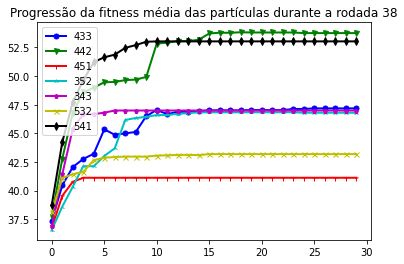

Resultados da rodada 38
Pontuação Máxima: 60.15 | Custo: 113.56 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

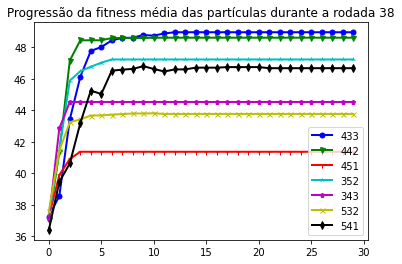

Resultados da rodada 38
Pontuação Máxima: 56.9 | Custo: 117.22 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

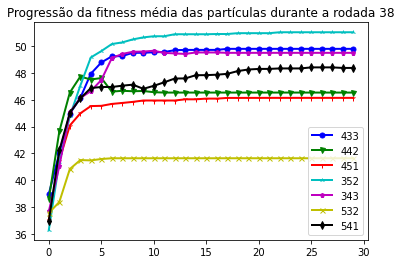

Resultados da rodada 38
Pontuação Máxima: 59.8 | Custo: 120.53 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

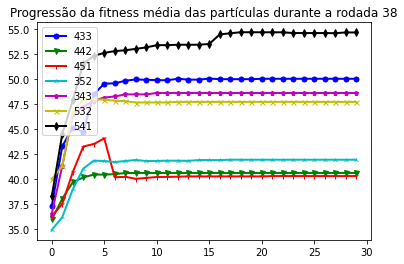

Resultados da rodada 38
Pontuação Máxima: 61.43 | Custo: 102.27 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

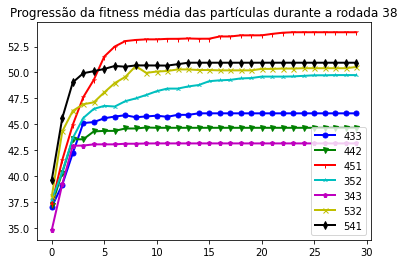

Resultados da rodada 38
Pontuação Máxima: 60.7 | Custo: 106.0 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

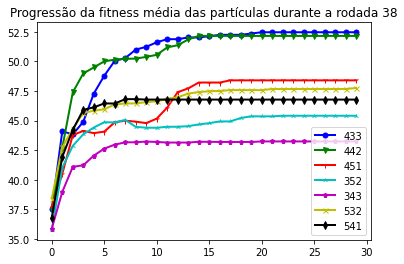

Resultados da rodada 38
Pontuação Máxima: 59.02 | Custo: 98.58 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

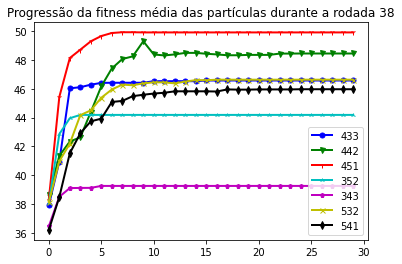

Resultados da rodada 38
Pontuação Máxima: 59.22 | Custo: 106.71 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

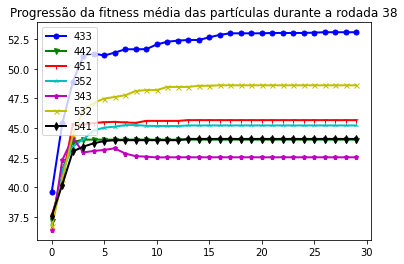

Resultados da rodada 38
Pontuação Máxima: 60.31 | Custo: 111.46 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

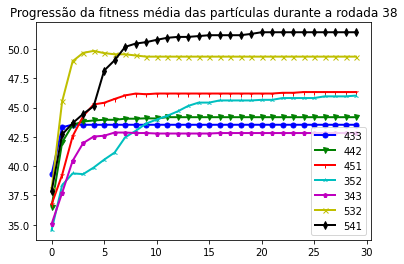

Resultados da rodada 38
Pontuação Máxima: 58.67 | Custo: 100.57 | Formação: 541
---------------------------------------------------------------------------
Média da pontuação: 59.42600000000001 | Desvio padrão da pontuação: 1.27
Média do custo: 108.37700000000002 | Desvio padrão do custo: 6.84


In [84]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Alteração: uso de pontos ao invés de mádia_pontos

In [98]:
class Time:
    def __init__(self, formacao, time):
        self.formacao = formacao
        self.time = time
        self.preco = 0
        self.fit = 0
        self.pbest = self
        self.pbest_fit = self.fit
        self.velocidade = [0]*12
        
    def calc_fit(self,jogadores_filt):
        pontos = 0
        for v in self.time:
            pontos += jogadores_filt.iloc[v]['pontos']
        self.fit = pontos
        return self.fit

    def calc_custo(self,jogadores_filt,aux=None):
        preco = 0
        if aux != None:
            for v in aux:
                preco += jogadores_filt.iloc[v]['preco']
            return preco
        for v in self.time:
            preco += jogadores_filt.iloc[v]['preco']
        self.preco = preco
        return self.preco
    
    def calc_velocidade(self,gbest):
        B = c1 + c2
        X = 2/(12-B-math.sqrt(abs(B**2-4*B)))
        tx_aprendizagem_1 = random.random()
        tx_aprendizagem_2 = random.random()
        for i in range(len(self.velocidade)):
            self.velocidade[i] = int(X*self.velocidade[i] + c1*tx_aprendizagem_1*(self.pbest.time[i]-self.time[i])+c2*tx_aprendizagem_2*(gbest.time[i]-self.time[i]))
    
    def update_pos(self,vmax,gbest,jogadores_filt):
        new_team = []
        aux = self.time.copy()
        for i in range(len(self.time)):
            if abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < abs((self.time[i]+self.velocidade[i])-gbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < self.velocidade[i] and\
            self.pbest.time[i] not in new_team:
                aux[i] = self.pbest.time[i]
            elif abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < self.velocidade[i] and\
            gbest.time[i] not in new_team:
                aux[i] = gbest.time[i]
            else:
                while (aux[i] in new_team == True):
                    pos = jogadores_filt.iloc[aux[i]]['posicao']
                    new = jogadores_filt.loc[jogadores_filt['posicao']==pos].sample(n = 1)
                    aux[i] = new['order']
            new_team.append(aux[i])
        preco = self.calc_custo(jogadores_filt,new_team)
        if preco <= num_cartoletas:
            self.time = new_team
    
def cria_particulas(formacao,jogadores_filt):
    particulas = []
    for i in range(num_particulas):
        time = []
        if formacao[0] == '4':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 2, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        elif formacao[0] == '5':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 3, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        else:
            defesa = jogadores_filt.loc[(jogadores_filt['posicao']=='zag')|(jogadores_filt['posicao']=='lat')].sample(n = 3, replace = False)
            time += defesa['order'].tolist()
        mei = jogadores_filt.loc[jogadores_filt['posicao']=='mei'].sample(n = int(formacao[1]), replace = False)
        time += mei['order'].tolist()
        
        ata = jogadores_filt.loc[jogadores_filt['posicao']=='ata'].sample(n = int(formacao[2]), replace = False)
        time += ata['order'].tolist()
        
        tec = jogadores_filt.loc[jogadores_filt['posicao']=='tec'].sample(n = 1, replace = False)
        time += tec['order'].tolist()
        
        gol = jogadores_filt.loc[jogadores_filt['posicao']=='gol'].sample(n = 1, replace = False)
        time += gol['order'].tolist()
        
        time_formado = Time(formacao,time)
        particulas.append(time_formado)
    return particulas

def retorna_time(formacao,jogadores_filt,vmax):
    gbest = Time('',[0]*12)
    gbest_fit = 0
    gbest_preco = 0
    particulas = cria_particulas(formacao,jogadores_filt)
    it = 0
    store = []
    while it < max_iteracoes:
        avg = 0
        for p in particulas:
            fit = p.calc_fit(jogadores_filt)
            preco = p.calc_custo(jogadores_filt)
            if fit > gbest_fit and preco <= num_cartoletas:
                gbest_fit = fit
                gbest = p
                gbest_preco = preco
                p.pbest = p
                p.pbest_fit = fit
            elif fit > p.pbest_fit and preco <= num_cartoletas:
                p.pbest = p
                p.pbest_fit = fit 
            avg += fit
        for p in particulas:
            p.calc_velocidade(gbest)
            p.update_pos(vmax,gbest,jogadores_filt)
        it += 1
        store.append(avg/num_particulas)
    final_frame = jogadores_filt.loc[jogadores_filt['order'].isin(gbest.time)]
    return gbest,store

def PSO():
    results = []
    for num_rodada in rodadas:
        max_team = None
        max_team_fit = 0
        jogadores_filt = jogadores.loc[(jogadores['rodada']==num_rodada) & (jogadores['status'] == 'Provável')]
        print(jogadores_filt)
        vmax = jogadores_filt['id'].count()
        jogadores_filt.insert(0, 'order', list(range(0,vmax)))
        for1,store1 = retorna_time('433',jogadores_filt,vmax)
        for2,store2 = retorna_time('442',jogadores_filt,vmax)
        for3,store3 = retorna_time('451',jogadores_filt,vmax)
        for4,store4 = retorna_time('352',jogadores_filt,vmax)
        for5,store5 = retorna_time('343',jogadores_filt,vmax)
        for6,store6 = retorna_time('532',jogadores_filt,vmax)
        for7,store7 = retorna_time('541',jogadores_filt,vmax)
        teams = [for1,for2,for3,for4,for5,for6,for7]
        for t in teams:
            if t.fit > max_team_fit:
                max_team = t
                max_team_fit = t.fit
        results.append(max_team)
        
        df=pd.DataFrame({'x':range(0,max_iteracoes),'433':store1,'442':store2,'451':store3,'352':store4,'343':store5,'532':store6,'541':store7})
        plt.plot( 'x', '433', data=df, marker='o', markerfacecolor='b', markersize=5, color='b', linewidth=2)
        plt.plot( 'x', '442', data=df, marker='v', markerfacecolor='g', markersize=5, color='g', linewidth=2)
        plt.plot( 'x', '451', data=df, marker='1', markerfacecolor='r', markersize=5, color='r', linewidth=2)
        plt.plot( 'x', '352', data=df, marker='2', markerfacecolor='c', markersize=5, color='c', linewidth=2)
        plt.plot( 'x', '343', data=df, marker='p', markerfacecolor='m', markersize=5, color='m', linewidth=2)
        plt.plot( 'x', '532', data=df, marker='x', markerfacecolor='y', markersize=5, color='y', linewidth=2)
        plt.plot( 'x', '541', data=df, marker='d', markerfacecolor='k', markersize=5, color='k', linewidth=2)
        plt.title('Progressão da fitness média das partículas durante a rodada '+str(num_rodada))
        plt.legend()
        plt.show()
        print('Resultados da rodada',num_rodada)
        print('Pontuação Máxima:',round(max_team.fit,2),'| Custo:',round(max_team.preco,2),'| Formação:',max_team.formacao)
        print('---------------------------------------------------------------------------')
        
    return results

### Após definição dos melhores parâmetros - valores reais

#### Rodada 11

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


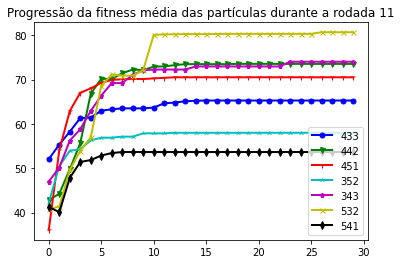

Resultados da rodada 11
Pontuação Máxima: 95.04 | Custo: 87.19 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

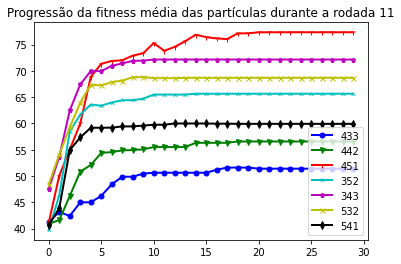

Resultados da rodada 11
Pontuação Máxima: 97.05 | Custo: 89.7 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 col

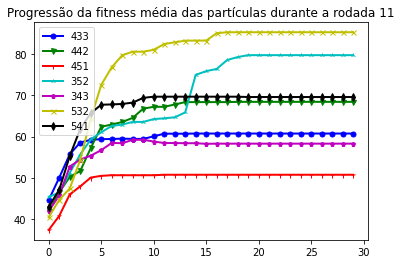

Resultados da rodada 11
Pontuação Máxima: 106.81 | Custo: 89.55 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

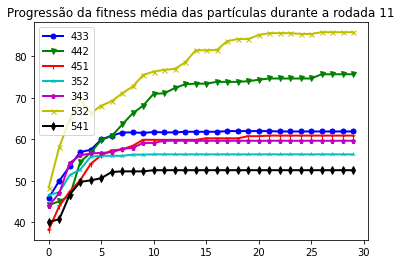

Resultados da rodada 11
Pontuação Máxima: 100.54 | Custo: 81.18 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

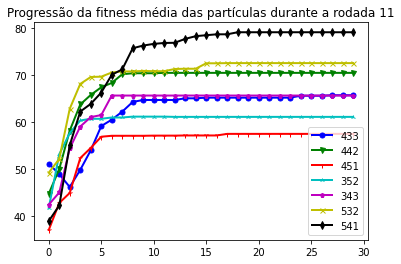

Resultados da rodada 11
Pontuação Máxima: 98.9 | Custo: 87.95 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 col

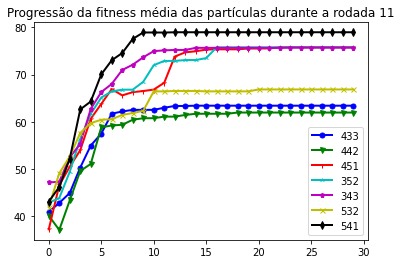

Resultados da rodada 11
Pontuação Máxima: 97.5 | Custo: 85.9 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 colu

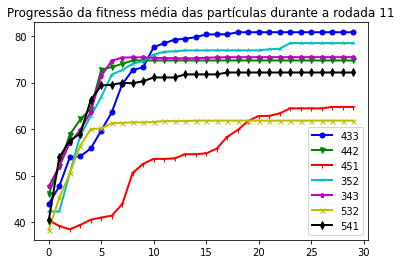

Resultados da rodada 11
Pontuação Máxima: 100.8 | Custo: 78.69 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 co

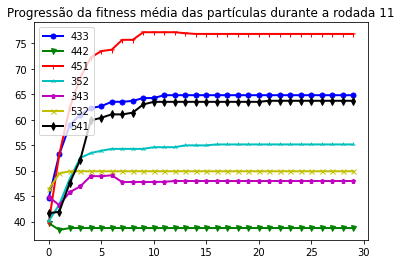

Resultados da rodada 11
Pontuação Máxima: 100.75 | Custo: 86.11 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

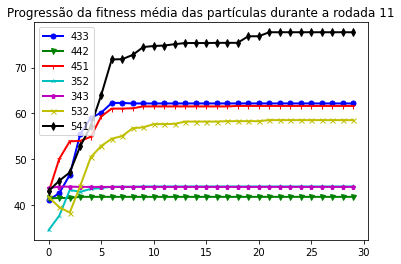

Resultados da rodada 11
Pontuação Máxima: 92.6 | Custo: 83.4 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 colu

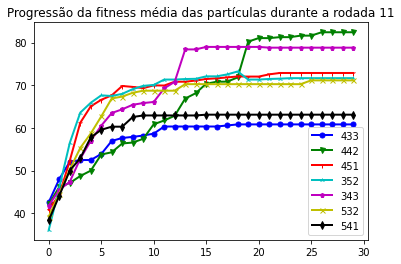

Resultados da rodada 11
Pontuação Máxima: 91.55 | Custo: 88.63 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 98.15400000000002 | Desvio padrão da pontuação: 4.25
Média do custo: 85.83000000000001 | Desvio padrão do custo: 3.49


In [89]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


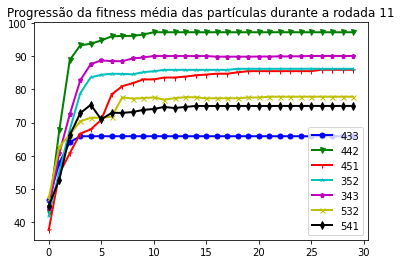

Resultados da rodada 11
Pontuação Máxima: 119.0 | Custo: 110.35 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

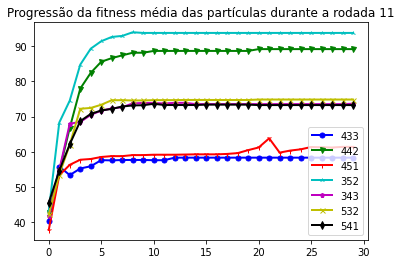

Resultados da rodada 11
Pontuação Máxima: 114.64 | Custo: 126.27 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

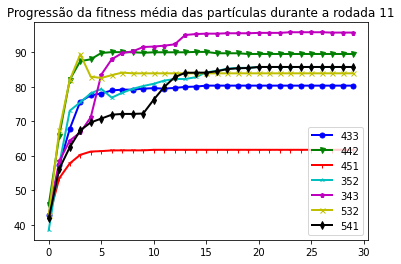

Resultados da rodada 11
Pontuação Máxima: 117.7 | Custo: 129.79 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

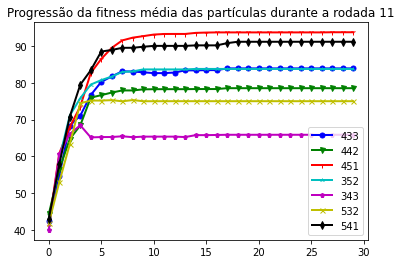

Resultados da rodada 11
Pontuação Máxima: 111.25 | Custo: 119.2 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

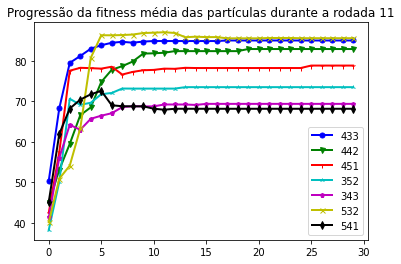

Resultados da rodada 11
Pontuação Máxima: 113.97 | Custo: 113.49 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

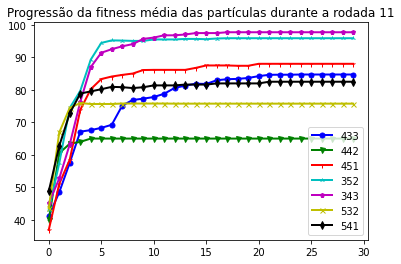

Resultados da rodada 11
Pontuação Máxima: 121.9 | Custo: 133.04 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

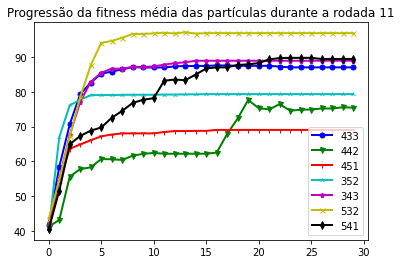

Resultados da rodada 11
Pontuação Máxima: 116.25 | Custo: 109.98 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

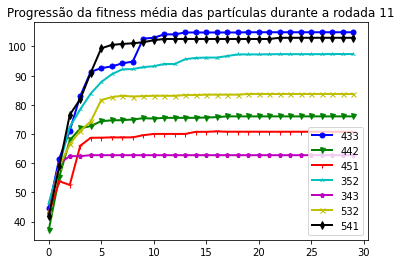

Resultados da rodada 11
Pontuação Máxima: 138.34 | Custo: 106.4 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

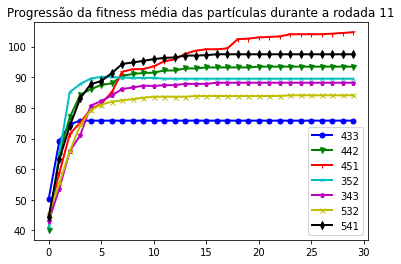

Resultados da rodada 11
Pontuação Máxima: 115.74 | Custo: 99.37 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

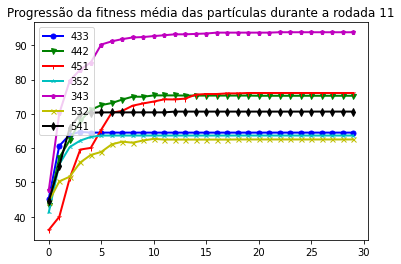

Resultados da rodada 11
Pontuação Máxima: 121.81 | Custo: 109.11 | Formação: 343
---------------------------------------------------------------------------
Média da pontuação: 119.05999999999999 | Desvio padrão da pontuação: 7.17
Média do custo: 115.7 | Desvio padrão do custo: 10.42


In [90]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 columns]


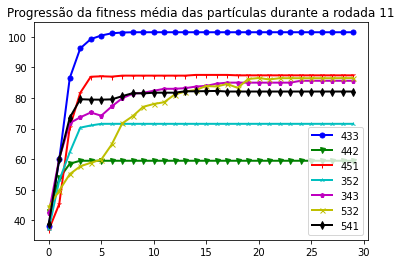

Resultados da rodada 11
Pontuação Máxima: 125.5 | Custo: 127.64 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

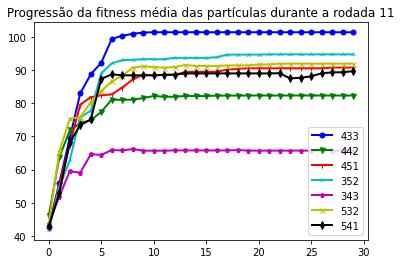

Resultados da rodada 11
Pontuação Máxima: 120.6 | Custo: 114.83 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

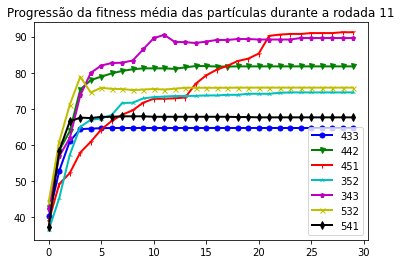

Resultados da rodada 11
Pontuação Máxima: 108.14 | Custo: 101.03 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

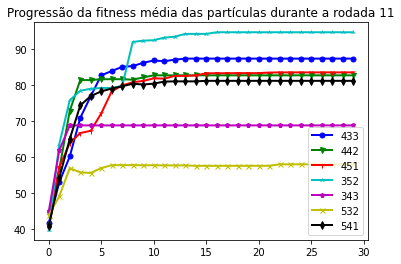

Resultados da rodada 11
Pontuação Máxima: 127.5 | Custo: 120.59 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

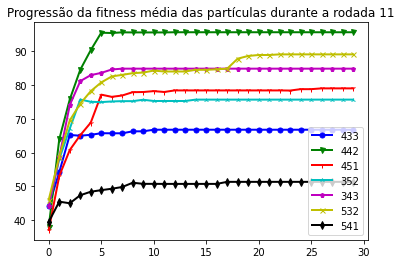

Resultados da rodada 11
Pontuação Máxima: 109.7 | Custo: 122.49 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 c

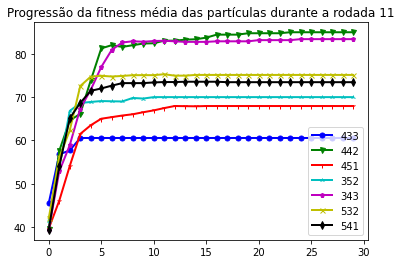

Resultados da rodada 11
Pontuação Máxima: 109.41 | Custo: 131.96 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

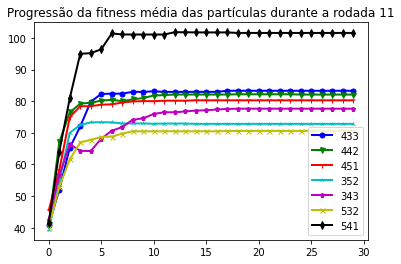

Resultados da rodada 11
Pontuação Máxima: 119.85 | Custo: 119.13 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

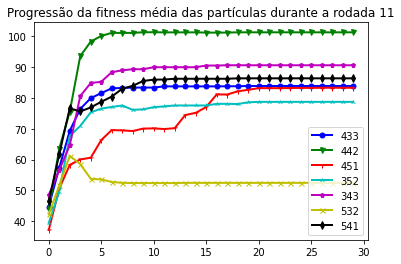

Resultados da rodada 11
Pontuação Máxima: 118.41 | Custo: 137.52 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

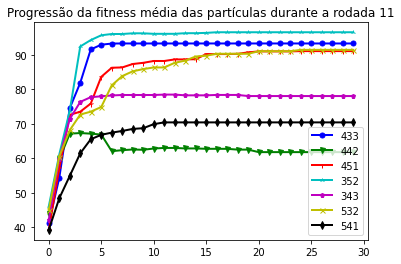

Resultados da rodada 11
Pontuação Máxima: 122.75 | Custo: 154.94 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
86      37281      11     tec    1.69          4.17  10.43  Provável
102     37306      11     tec    6.44          3.75   8.09  Provável
301     37656      11     gol   -1.30          5.71  10.87  Provável
339     37657      11     zag    4.50          1.98   6.45  Provável
400     37674      11     mei    0.00          1.99   9.17  Provável
...       ...     ...     ...     ...           ...    ...       ...
25918  100125      11     zag   10.00          7.85   5.26  Provável
26279  100651      11     ata    1.70          6.18  12.02  Provável
27308  101314      11     ata    5.10          4.24   3.54  Provável
27639  101484      11     mei    0.00          1.96   3.36  Provável
29158  101957      11     tec    6.40          5.40  11.15  Provável

[225 rows x 7 

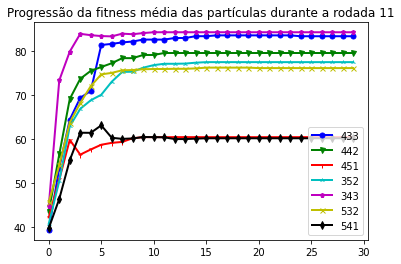

Resultados da rodada 11
Pontuação Máxima: 110.75 | Custo: 99.61 | Formação: 343
---------------------------------------------------------------------------
Média da pontuação: 117.261 | Desvio padrão da pontuação: 6.83
Média do custo: 122.974 | Desvio padrão do custo: 15.65


In [91]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 23

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


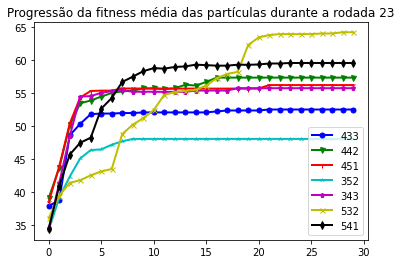

Resultados da rodada 23
Pontuação Máxima: 77.1 | Custo: 86.91 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

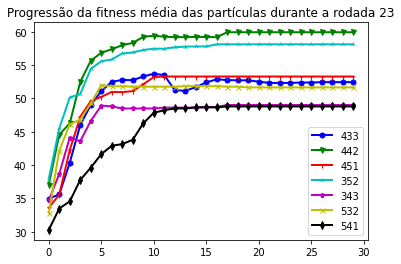

Resultados da rodada 23
Pontuação Máxima: 75.09 | Custo: 81.14 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

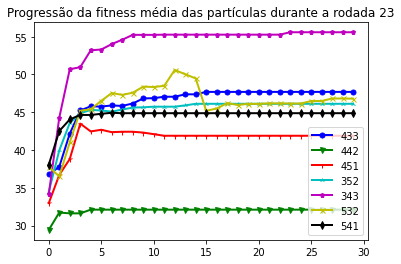

Resultados da rodada 23
Pontuação Máxima: 66.16 | Custo: 75.12 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

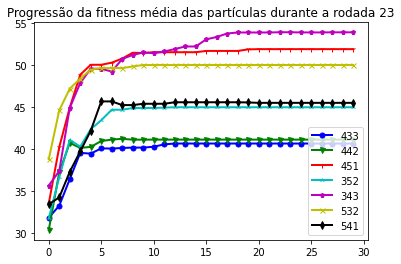

Resultados da rodada 23
Pontuação Máxima: 71.5 | Custo: 74.1 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 colu

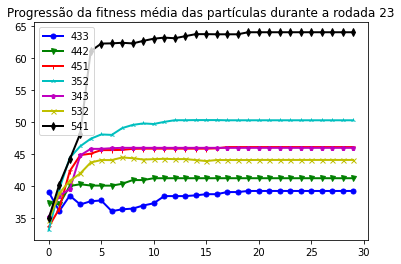

Resultados da rodada 23
Pontuação Máxima: 89.2 | Custo: 85.01 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

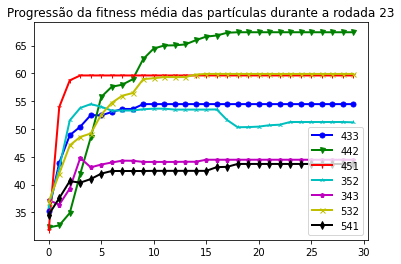

Resultados da rodada 23
Pontuação Máxima: 85.86 | Custo: 88.54 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

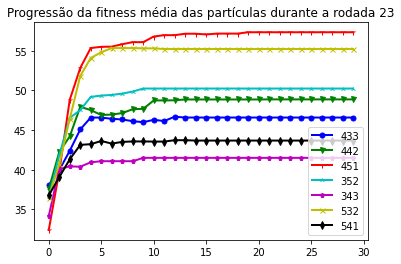

Resultados da rodada 23
Pontuação Máxima: 74.25 | Custo: 85.25 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

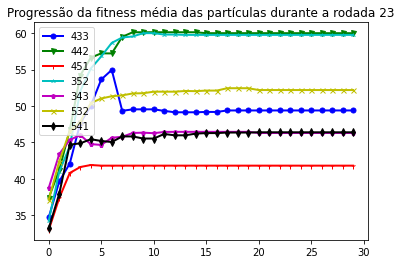

Resultados da rodada 23
Pontuação Máxima: 92.56 | Custo: 83.0 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

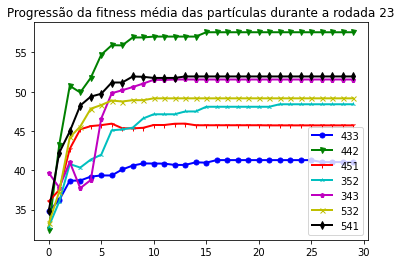

Resultados da rodada 23
Pontuação Máxima: 74.15 | Custo: 78.51 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

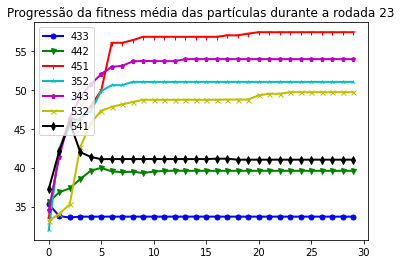

Resultados da rodada 23
Pontuação Máxima: 76.06 | Custo: 88.87 | Formação: 451
---------------------------------------------------------------------------
Média da pontuação: 78.19300000000001 | Desvio padrão da pontuação: 7.89
Média do custo: 82.645 | Desvio padrão do custo: 5.03


In [92]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


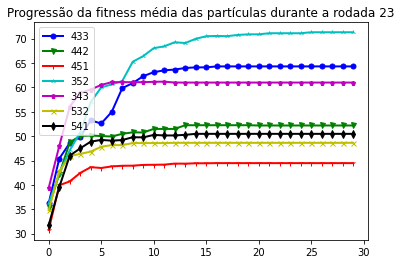

Resultados da rodada 23
Pontuação Máxima: 82.86 | Custo: 85.43 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

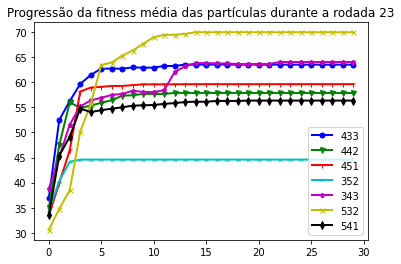

Resultados da rodada 23
Pontuação Máxima: 99.7 | Custo: 114.28 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

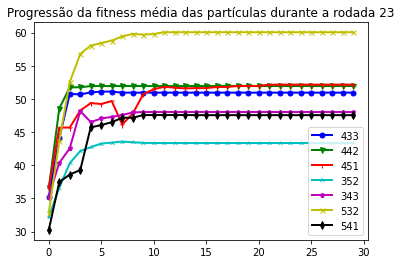

Resultados da rodada 23
Pontuação Máxima: 82.15 | Custo: 75.17 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

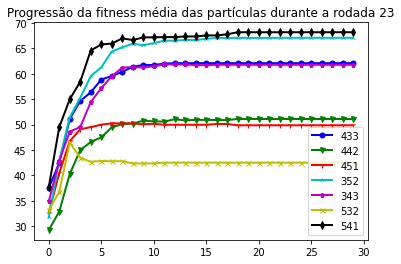

Resultados da rodada 23
Pontuação Máxima: 87.4 | Custo: 107.34 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

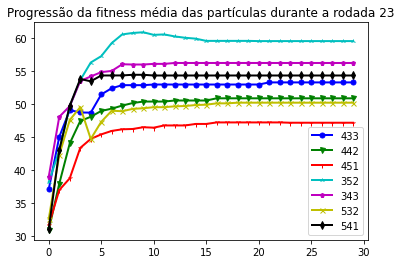

Resultados da rodada 23
Pontuação Máxima: 78.6 | Custo: 106.73 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

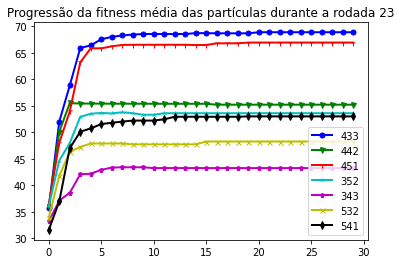

Resultados da rodada 23
Pontuação Máxima: 87.9 | Custo: 110.35 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

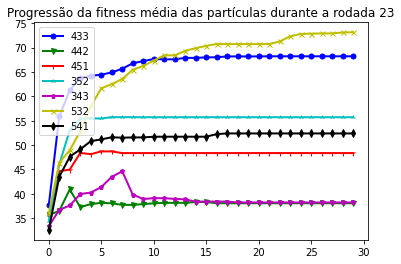

Resultados da rodada 23
Pontuação Máxima: 86.92 | Custo: 118.08 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

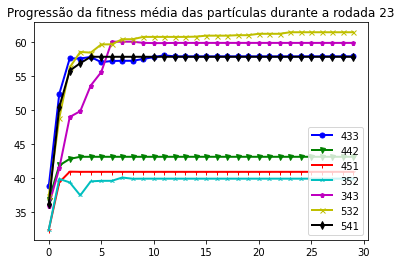

Resultados da rodada 23
Pontuação Máxima: 83.7 | Custo: 130.25 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

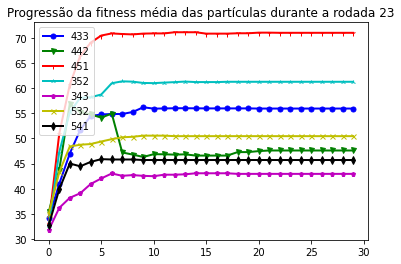

Resultados da rodada 23
Pontuação Máxima: 90.85 | Custo: 124.95 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

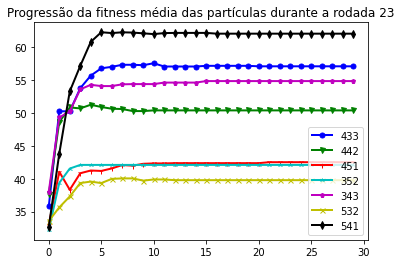

Resultados da rodada 23
Pontuação Máxima: 85.79 | Custo: 103.94 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 86.587 | Desvio padrão da pontuação: 5.47
Média do custo: 107.652 | Desvio padrão do custo: 15.92


In [93]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 columns]


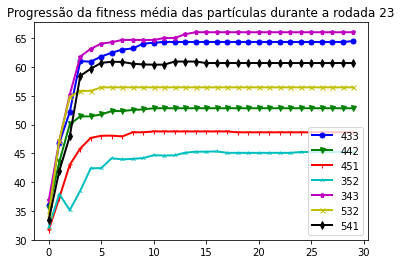

Resultados da rodada 23
Pontuação Máxima: 90.12 | Custo: 96.54 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

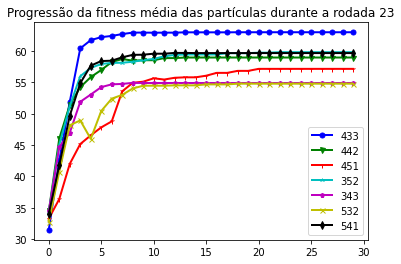

Resultados da rodada 23
Pontuação Máxima: 82.66 | Custo: 83.67 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

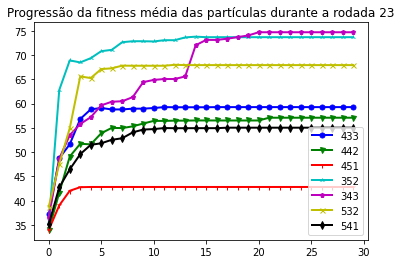

Resultados da rodada 23
Pontuação Máxima: 95.7 | Custo: 114.22 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

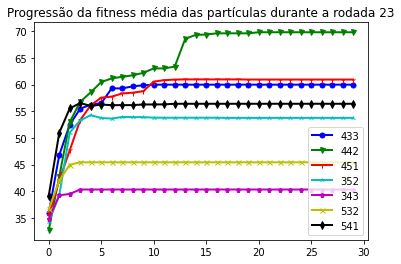

Resultados da rodada 23
Pontuação Máxima: 84.42 | Custo: 116.88 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 c

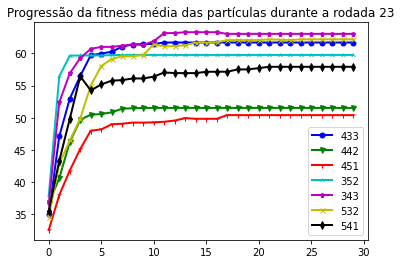

Resultados da rodada 23
Pontuação Máxima: 87.52 | Custo: 75.93 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

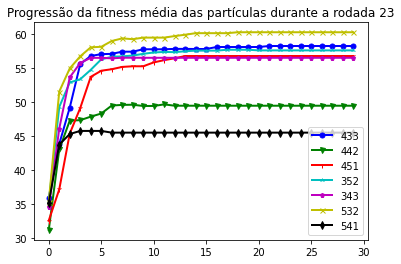

Resultados da rodada 23
Pontuação Máxima: 77.32 | Custo: 84.19 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

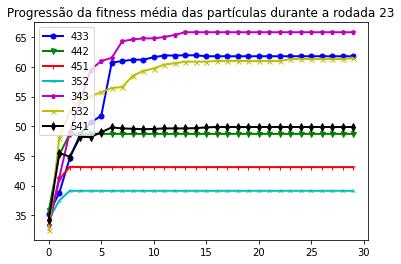

Resultados da rodada 23
Pontuação Máxima: 79.8 | Custo: 80.57 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 col

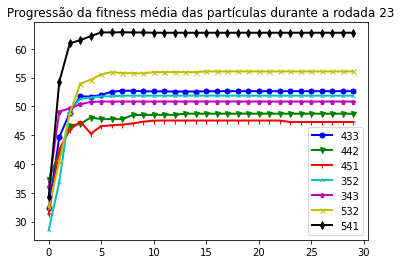

Resultados da rodada 23
Pontuação Máxima: 85.39 | Custo: 81.92 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

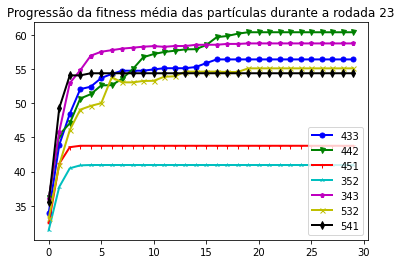

Resultados da rodada 23
Pontuação Máxima: 83.06 | Custo: 89.51 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
44      37245      23     tec    2.62          3.51   8.42  Provável
74      37281      23     tec    2.19          3.67  10.75  Provável
289     37656      23     gol    6.70          3.51  10.90  Provável
365     37662      23     lat   -1.70          4.15   8.39  Provável
388     37674      23     mei    2.40          2.89   9.62  Provável
...       ...     ...     ...     ...           ...    ...       ...
27399  101422      23     ata   -2.40          1.78   1.97  Provável
27931  101585      23     mei    0.60          1.45   1.04  Provável
28358  101708      23     lat   -1.30         -1.30   0.77  Provável
29146  101957      23     tec    4.70          4.69  11.60  Provável
30706  103088      23     zag    6.20          3.30   3.78  Provável

[220 rows x 7 co

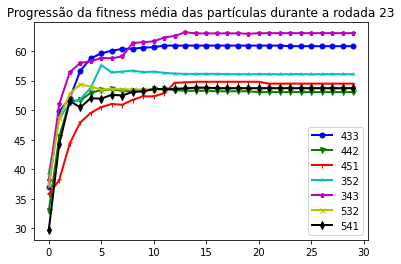

Resultados da rodada 23
Pontuação Máxima: 86.7 | Custo: 90.16 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 85.269 | Desvio padrão da pontuação: 4.95
Média do custo: 91.359 | Desvio padrão do custo: 13.27


In [94]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 38

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


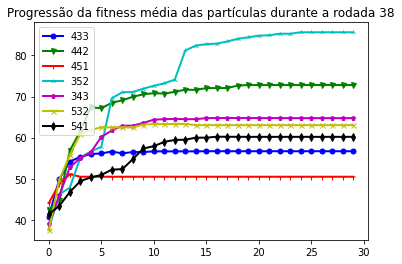

Resultados da rodada 38
Pontuação Máxima: 100.78 | Custo: 73.12 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

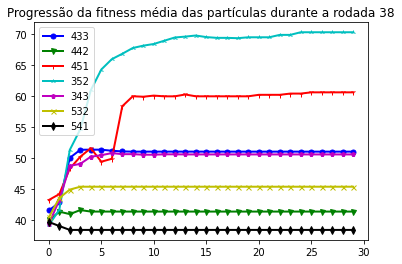

Resultados da rodada 38
Pontuação Máxima: 80.35 | Custo: 64.74 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

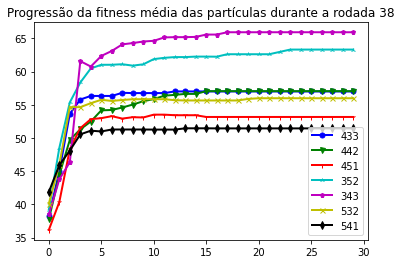

Resultados da rodada 38
Pontuação Máxima: 78.92 | Custo: 71.81 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

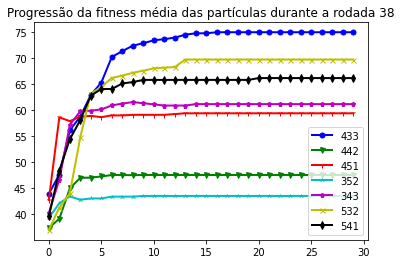

Resultados da rodada 38
Pontuação Máxima: 86.57 | Custo: 78.29 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

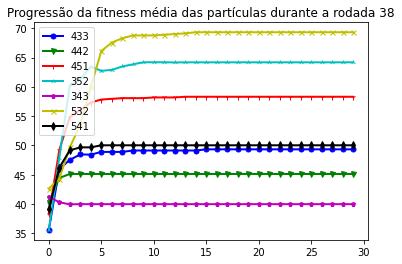

Resultados da rodada 38
Pontuação Máxima: 87.85 | Custo: 81.32 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

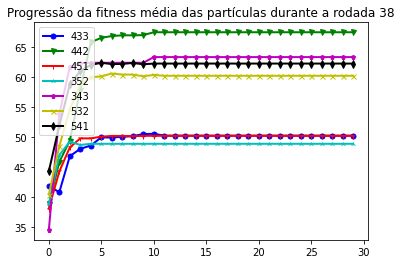

Resultados da rodada 38
Pontuação Máxima: 80.52 | Custo: 78.26 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

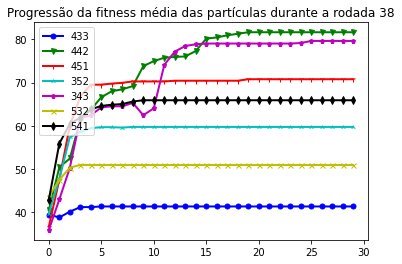

Resultados da rodada 38
Pontuação Máxima: 98.08 | Custo: 81.47 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

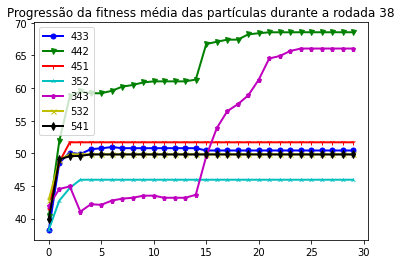

Resultados da rodada 38
Pontuação Máxima: 87.15 | Custo: 88.74 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

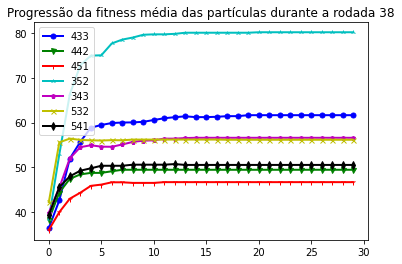

Resultados da rodada 38
Pontuação Máxima: 94.15 | Custo: 83.51 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

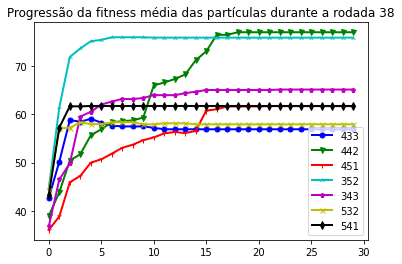

Resultados da rodada 38
Pontuação Máxima: 91.18 | Custo: 69.32 | Formação: 442
---------------------------------------------------------------------------
Média da pontuação: 88.55499999999999 | Desvio padrão da pontuação: 7.14
Média do custo: 77.05799999999999 | Desvio padrão do custo: 6.88


In [95]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


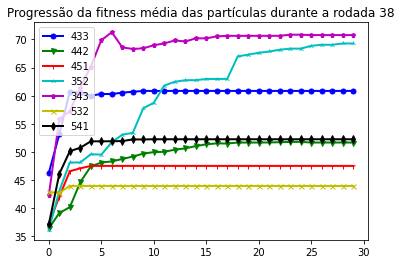

Resultados da rodada 38
Pontuação Máxima: 90.12 | Custo: 76.58 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

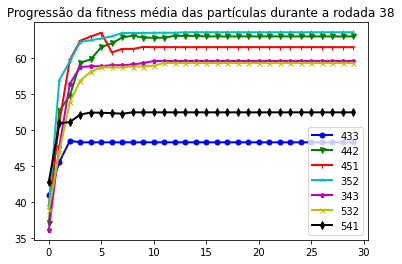

Resultados da rodada 38
Pontuação Máxima: 86.38 | Custo: 99.68 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

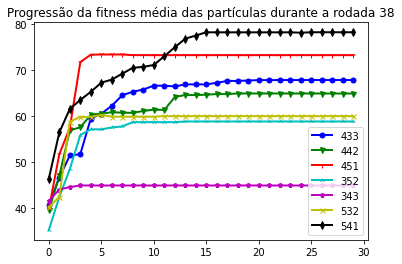

Resultados da rodada 38
Pontuação Máxima: 93.08 | Custo: 109.05 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

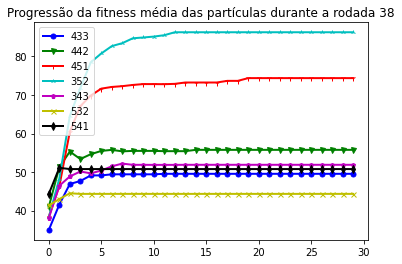

Resultados da rodada 38
Pontuação Máxima: 95.85 | Custo: 66.9 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

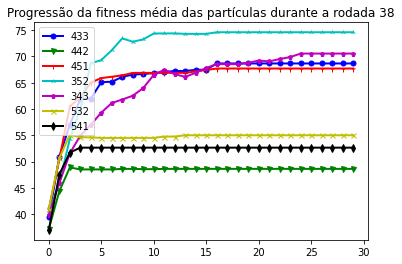

Resultados da rodada 38
Pontuação Máxima: 92.21 | Custo: 91.6 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 col

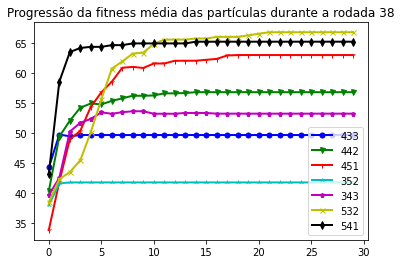

Resultados da rodada 38
Pontuação Máxima: 81.17 | Custo: 75.39 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

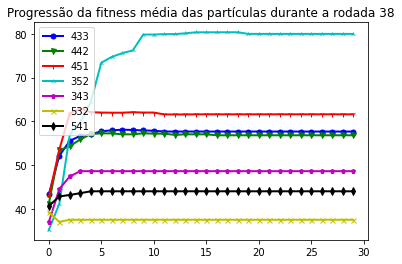

Resultados da rodada 38
Pontuação Máxima: 96.08 | Custo: 96.15 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

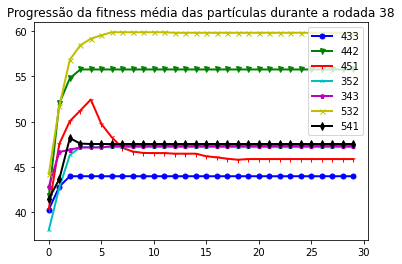

Resultados da rodada 38
Pontuação Máxima: 76.55 | Custo: 102.52 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 c

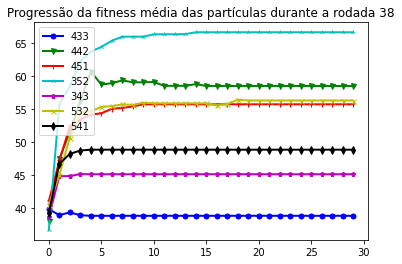

Resultados da rodada 38
Pontuação Máxima: 90.11 | Custo: 93.56 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 co

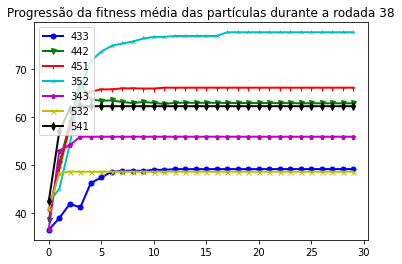

Resultados da rodada 38
Pontuação Máxima: 92.05 | Custo: 71.16 | Formação: 352
---------------------------------------------------------------------------
Média da pontuação: 89.35999999999999 | Desvio padrão da pontuação: 5.98
Média do custo: 88.259 | Desvio padrão do custo: 13.85


In [96]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295      38     mei   -0.30          4.06   6.51  Provável
30884  103559      38     ata   -0.90          1.67   1.87  Provável
30946  103746      38     tec    6.48          6.48  11.23  Provável

[227 rows x 7 columns]


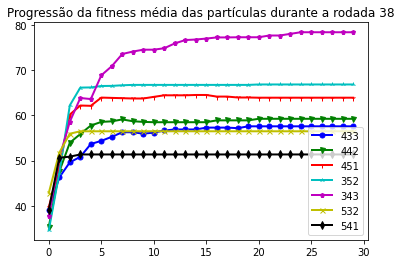

lat | 10.1 | 5.44
lat | 13.4 | 9.03
lat | 0.5 | 2.32
mei | 3.7 | 1.54
mei | 9.2 | 9.81
mei | 4.8 | 4.41
mei | 12.9 | 5.71
ata | 10.8 | 13.05
ata | 4.3 | 10.47
ata | 6.7 | 6.69
tec | 6.48 | 11.23
gol | 4.7 | 5.65
Resultados da rodada 38
Pontuação Máxima: 87.58 | Custo: 85.35 | Formação: 343
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  10329

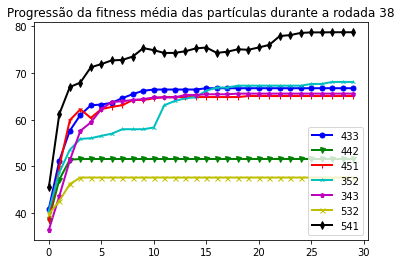

zag | 5.7 | 4.0
zag | 3.8 | 9.76
zag | 5.2 | 11.25
lat | 13.4 | 9.03
lat | 12.5 | 5.72
mei | 9.8 | 9.63
mei | 9.8 | 9.63
mei | 8.9 | 9.78
mei | 12.9 | 5.71
ata | 10.8 | 13.05
tec | 6.48 | 11.23
gol | -3.8 | 4.69
Resultados da rodada 38
Pontuação Máxima: 95.48 | Custo: 103.48 | Formação: 541
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  1032

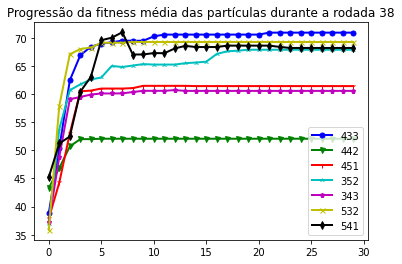

zag | 5.7 | 4.0
zag | 9.0 | 2.38
lat | 12.5 | 5.72
lat | 13.4 | 9.03
mei | 1.4 | 10.96
mei | 12.0 | 3.35
mei | 5.3 | 5.57
ata | 3.3 | 8.33
ata | 10.8 | 13.05
ata | 14.0 | 17.35
tec | 2.72 | 6.92
gol | 2.0 | 14.43
Resultados da rodada 38
Pontuação Máxima: 92.12 | Custo: 101.09 | Formação: 433
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103

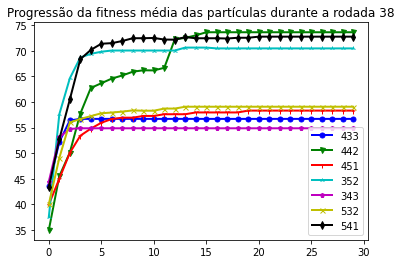

zag | 5.2 | 11.25
zag | 9.0 | 2.38
lat | 12.5 | 5.72
lat | 13.4 | 9.03
mei | 3.7 | 1.54
mei | 12.0 | 3.35
mei | 4.8 | 4.41
mei | 9.8 | 9.63
ata | 3.1 | 6.76
ata | 6.7 | 6.69
tec | 3.56 | 8.51
gol | 8.0 | 7.64
Resultados da rodada 38
Pontuação Máxima: 91.76 | Custo: 76.91 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295  

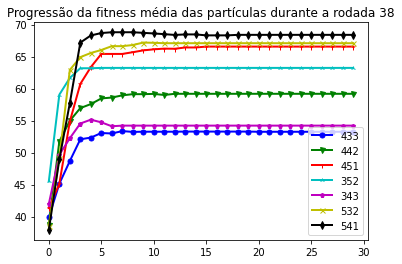

zag | 2.7 | 7.72
lat | 5.8 | 11.12
zag | 9.0 | 2.38
mei | 1.5 | 6.42
mei | 4.4 | 2.47
mei | 1.4 | 10.96
mei | 5.9 | 3.31
mei | 12.9 | 5.71
ata | 14.0 | 17.35
ata | 5.4 | 14.77
tec | 5.15 | 11.3
gol | 17.7 | 8.7
Resultados da rodada 38
Pontuação Máxima: 85.85 | Custo: 102.21 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  10329

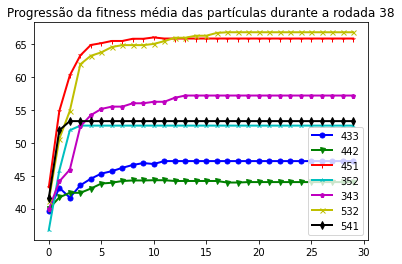

zag | 6.4 | 5.95
zag | 4.4 | 6.37
zag | 11.3 | 10.05
lat | 12.5 | 5.72
lat | 12.5 | 5.72
mei | 8.9 | 9.78
mei | 4.0 | 3.84
mei | 1.0 | 5.36
ata | 4.7 | 7.3
ata | 4.3 | 10.47
tec | 6.48 | 11.23
gol | 17.7 | 8.7
Resultados da rodada 38
Pontuação Máxima: 94.18 | Custo: 90.49 | Formação: 532
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295 

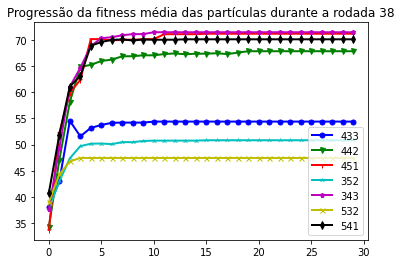

zag | 6.4 | 5.93
zag | 4.5 | 8.16
lat | 12.5 | 5.72
lat | 13.4 | 9.03
mei | 12.0 | 3.35
mei | 12.9 | 5.71
mei | 0.5 | 4.11
mei | 4.8 | 4.41
mei | 6.1 | 2.13
ata | 14.0 | 17.35
tec | 0.61 | 9.96
gol | 1.0 | 5.49
Resultados da rodada 38
Pontuação Máxima: 88.71 | Custo: 81.35 | Formação: 451
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295

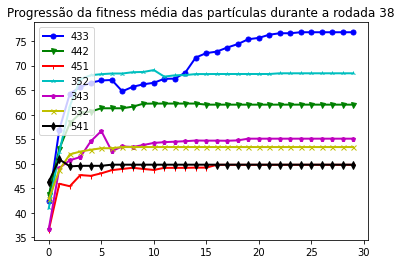

zag | 4.2 | 4.95
lat | 8.5 | 6.58
lat | 8.7 | 8.16
mei | 6.1 | 2.13
mei | 5.7 | 5.95
mei | 12.0 | 3.35
mei | 5.1 | 6.32
mei | 4.8 | 4.41
ata | 4.7 | 7.3
ata | 5.6 | 3.76
tec | 6.48 | 11.23
gol | 17.7 | 8.7
Resultados da rodada 38
Pontuação Máxima: 89.58 | Custo: 72.84 | Formação: 352
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  103295     

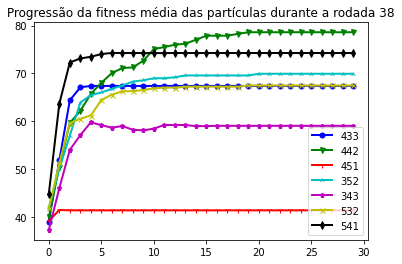

zag | 9.0 | 2.38
zag | 6.5 | 4.91
lat | 6.9 | 5.46
lat | 12.5 | 5.72
mei | -0.3 | 6.51
mei | 3.1 | 6.74
mei | 12.9 | 5.71
mei | 9.8 | 9.63
ata | 8.6 | 9.51
ata | 10.8 | 13.05
tec | 6.48 | 11.23
gol | 17.7 | 8.7
Resultados da rodada 38
Pontuação Máxima: 103.98 | Custo: 89.55 | Formação: 442
---------------------------------------------------------------------------
           id  rodada posicao  pontos  media_pontos  preco    status
59      37281      38     tec    5.15          3.64  11.30  Provável
236     37655      38     ata    2.30          2.33   8.97  Provável
312     37657      38     zag   10.80          2.04   6.89  Provável
487     37701      38     lat    4.60          6.06  11.62  Provável
639     37792      38     mei    0.00          0.14   2.20  Provável
...       ...     ...     ...     ...           ...    ...       ...
30691  103088      38     zag   -1.90          2.77   3.78  Provável
30731  103099      38     mei    3.20          0.08   1.59  Provável
30767  10329

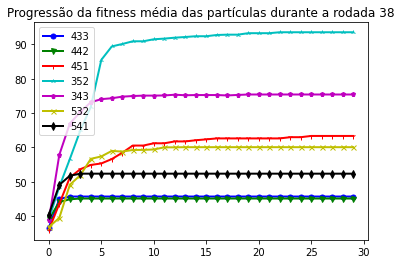

lat | 13.4 | 9.03
zag | 9.0 | 2.38
lat | 12.5 | 5.72
mei | 9.2 | 9.81
mei | 12.0 | 3.35
mei | 6.1 | 2.13
mei | 12.9 | 5.71
mei | 4.4 | 2.47
ata | 5.6 | 3.76
ata | 10.8 | 13.05
tec | 5.05 | 9.44
gol | 4.7 | 5.65
Resultados da rodada 38
Pontuação Máxima: 105.65 | Custo: 72.5 | Formação: 352
---------------------------------------------------------------------------
Média da pontuação: 93.489 | Desvio padrão da pontuação: 6.31
Média do custo: 87.577 | Desvio padrão do custo: 11.24


In [99]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))